In [1]:
import pandas as pd
import evds
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from datetime import date
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np
import warnings
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error
from evds import evdsAPI
import pandas as pd
import numpy as np
import requests
import json
from urllib.parse import urlencode
warnings.filterwarnings("ignore")

In [2]:
buyume=pd.read_excel("gayrisafi yurtici hasila harcama yontemiyle mevsim ve takvim etkisinden arindirilmis zincirlenmis ha.xls")
buyume=buyume.iloc[:34,[1,19,20,21,22]].T
buyume=buyume.iloc[:,8:]
veri=[]
for i in range(len(buyume.columns)):
   veri.append(buyume.iloc[:,i].values[1:])

In [3]:
veri=np.array(veri)
veri=veri.reshape(1,-1)
veri=pd.DataFrame(veri.T)
veri.columns=["Büyüme"]
veri=veri.dropna()
veri=veri.set_index(pd.date_range(start="1999-03-31",freq="Q",periods=len(veri)))
veri

,Büyüme
1999-03-31,-1.68582
1999-06-30,-0.563716
1999-09-30,-1.686618
1999-12-31,2.98742
2000-03-31,1.574851
...,...
2023-12-31,1.166981
2024-03-31,0.97541
2024-06-30,-0.195958
2024-09-30,-0.067054


In [4]:
with open("C:/Users/Bora/Desktop/api.txt") as api:
    key=api.read()

In [5]:
params = {
    'series': "TP.DK.USD.S.YTL",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

usd = formatted_response['items']
usd = pd.DataFrame(usd)


usd = usd.drop(columns=['UNIXTIME','Tarih'])
usd.columns = ['USD/TL']
usd['USD/TL'] = pd.to_numeric(usd['USD/TL'])
usd=usd.set_index(pd.date_range(start="2006-01-31",freq="Q",periods=len(usd)))
usd=usd.pct_change()*100
usd=usd.dropna()
usd

,USD/TL
2006-06-30,9.336700
2006-09-30,3.109109
2006-12-31,-2.951977
2007-03-31,-3.182185
2007-06-30,-5.023656
...,...
2024-06-30,4.643019
2024-09-30,3.555937
2024-12-31,3.098104
2025-03-31,4.839644


In [6]:
params = {
    'series': "TP.KREDI.L001",
    'startDate': "31-12-2007",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

kredi = formatted_response['items']
kredi = pd.DataFrame(kredi)


kredi = kredi.drop(columns=['UNIXTIME','Tarih'])
kredi.columns = ['Kredi']
kredi['Kredi'] = pd.to_numeric(kredi['Kredi'])
kredi=kredi.dropna()
kredi=kredi.set_index(pd.date_range(start="31-12-2007",freq="M",periods=len(kredi)))
kredi=kredi.resample("Q").last()
kredi=kredi.pct_change()*100
kredi=kredi.set_index(pd.date_range(start="31-12-2007",freq="Q",periods=len(kredi)))
kredi=kredi.dropna()
kredi

,Kredi
2008-03-31,8.415812
2008-06-30,8.611317
2008-09-30,6.465078
2008-12-31,0.301982
2009-03-31,-1.910862
...,...
2024-03-31,10.994405
2024-06-30,8.314733
2024-09-30,7.989453
2024-12-31,6.786281


In [7]:
params = {
    'series': "TP.KKHARTUT.KT1",
    'startDate': "31-03-2014",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

kart = formatted_response['items']
kart = pd.DataFrame(kart)


kart = kart.drop(columns=['UNIXTIME','Tarih'])
kart.columns = ['Kart']
kart['Kart'] = pd.to_numeric(kart['Kart'])
kart=kart.set_index(pd.date_range(start="31-03-2014",freq="M",periods=len(kart)))
kart=kart.dropna()
kart=kart.resample("Q").mean()
kart=kart.pct_change().dropna()*100
kart

,Kart
2014-06-30,6.754972
2014-09-30,4.782597
2014-12-31,0.186316
2015-03-31,3.013984
2015-06-30,10.511476
2015-09-30,2.186056
2015-12-31,-0.932084
2016-03-31,0.701274
2016-06-30,7.737326
2016-09-30,1.395230


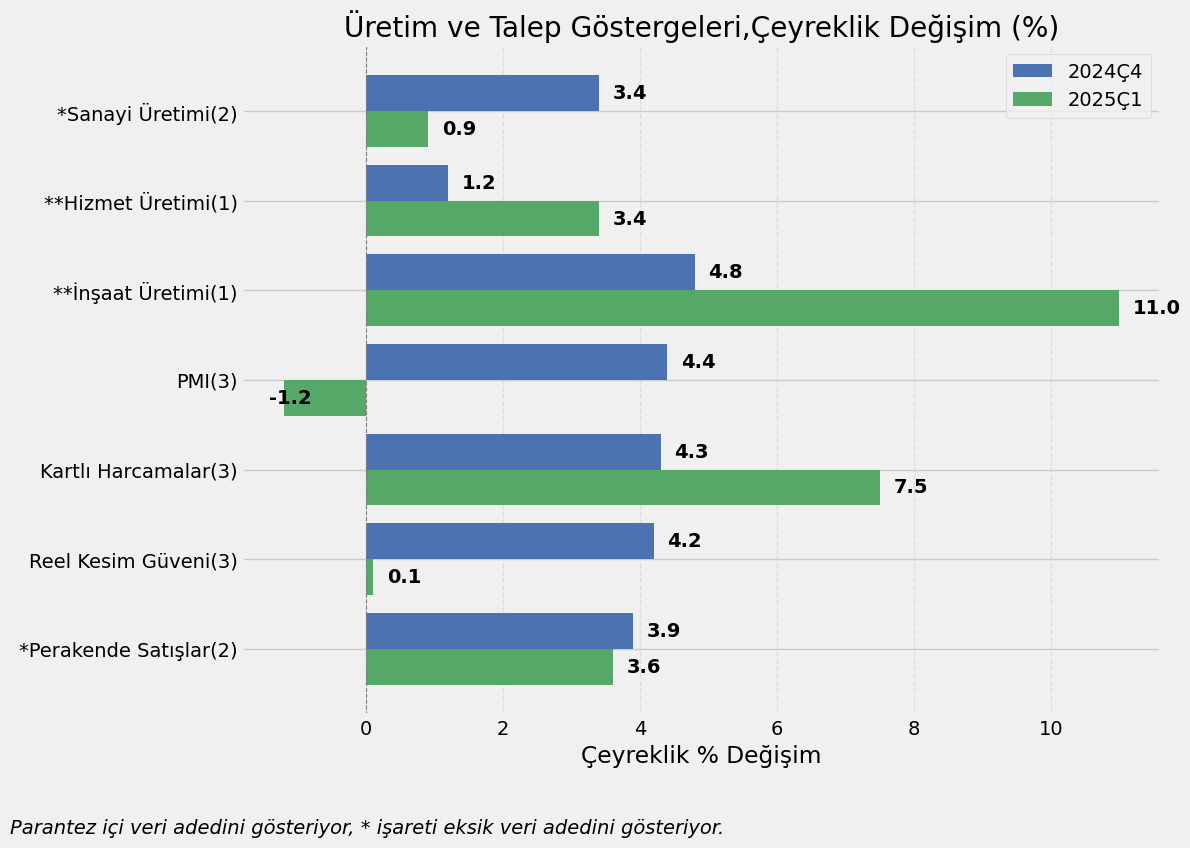

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Veri tanımı
gösterge = pd.DataFrame(columns=["2024Ç4", "2025Ç1"])
gösterge.loc["*Sanayi Üretimi(2)"] = [3.4, 0.9]
gösterge.loc["**Hizmet Üretimi(1)"] = [1.2, 3.4]
gösterge.loc["**İnşaat Üretimi(1)"] = [4.8, 11.0]
gösterge.loc["PMI(3)"] = [4.4, -1.2]
gösterge.loc["Kartlı Harcamalar(3)"] = [4.3, 7.5]
gösterge.loc["Reel Kesim Güveni(3)"] = [4.2, 0.1]
gösterge.loc["*Perakende Satışlar(2)"] = [3.9, 3.6]

# 2024 üstte olacak şekilde sıralama
gösterge = gösterge[["2024Ç4", "2025Ç1"]]

y = np.arange(len(gösterge))
bar_width = 0.4

# Grafik oluştur
fig, ax = plt.subplots(figsize=(12, 8))
bars1 = ax.barh(y - bar_width/2, gösterge["2024Ç4"], height=bar_width, label='2024Ç4', color='#4C72B0')
bars2 = ax.barh(y + bar_width/2, gösterge["2025Ç1"], height=bar_width, label='2025Ç1', color='#55A868')

# Değerleri kalın olarak ekle
for bars in [bars1, bars2]:
    for bar in bars:
        width = bar.get_width()
        ha = 'left' if width >= 0 else 'right'
        offset = 0.2 if width >= 0 else 0.4  # negatiflerde daha büyük boşluk
        ax.text(width + offset, bar.get_y() + bar.get_height()/2,
                f'{width:.1f}', va='center', ha=ha, fontweight='bold')

fig.text(0.01, -0.05, "Parantez içi veri adedini gösteriyor, * işareti eksik veri adedini gösteriyor.", 
         ha='left', va='center', fontsize=14, style='italic')

# Eksen ayarları
ax.set_yticks(y)
ax.set_yticklabels(gösterge.index)
ax.invert_yaxis()  # Bu satır önemli!
ax.set_xlabel('Çeyreklik % Değişim')
ax.set_title('Üretim ve Talep Göstergeleri,Çeyreklik Değişim (%)')
ax.axvline(0, color='gray', linewidth=0.8, linestyle='--')
ax.legend()
plt.tight_layout()
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.show()


In [9]:
params = {
    'series': "TP.CLI2.A01",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

öncü = formatted_response['items']
öncü = pd.DataFrame(öncü)


öncü = öncü.drop(columns=['UNIXTIME','Tarih'])
öncü.columns = ['Öncü Gösterge']
öncü['Öncü Gösterge'] = pd.to_numeric(öncü['Öncü Gösterge'])
öncü=öncü.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(öncü)))
öncü=öncü.pct_change()*100
öncü=öncü.dropna()
öncü

,Öncü Gösterge
1999-06-30,1.976838
1999-09-30,-0.090503
1999-12-31,2.521770
2000-03-31,3.539974
2000-06-30,-0.170672
...,...
2024-03-31,0.845456
2024-06-30,0.693852
2024-09-30,0.842966
2024-12-31,2.127951


In [10]:
params = {
    'series': "TP.IHRACATBEC.9999",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

ihracat = formatted_response['items']
ihracat = pd.DataFrame(ihracat)


ihracat = ihracat.drop(columns=['UNIXTIME','Tarih'])
ihracat.columns = ['İhracat']
ihracat['İhracat'] = pd.to_numeric(ihracat['İhracat'])
ihracat=ihracat.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(ihracat)))
ihracat=ihracat.pct_change()*100
ihracat=ihracat.dropna()
ihracat

,İhracat
2013-06-30,2.938221
2013-09-30,-2.843534
2013-12-31,6.008618
2014-03-31,0.797169
2014-06-30,0.069491
2014-09-30,-4.059849
2014-12-31,2.623426
2015-03-31,-6.256287
2015-06-30,-2.065737
2015-09-30,-7.425967


In [11]:
params = {
    'series': "TP.ITHALATBEC.9999",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

ithalat = formatted_response['items']
ithalat = pd.DataFrame(ithalat)


ithalat = ithalat.drop(columns=['UNIXTIME','Tarih'])
ithalat.columns = ['İthalat']
ithalat['İthalat'] = pd.to_numeric(ithalat['İthalat'])
ithalat=ithalat.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(ithalat)))
ithalat=ithalat.pct_change()*100
ithalat=ithalat.dropna()
ithalat

,İthalat
2013-06-30,13.045979
2013-09-30,-6.944537
2013-12-31,2.390350
2014-03-31,-8.643594
2014-06-30,6.982644
2014-09-30,-3.016522
2014-12-31,2.233891
2015-03-31,-14.936426
2015-06-30,2.664102
2015-09-30,-8.070364


In [12]:
params = {
    'series': "TP.KTF17",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

tfaiz = formatted_response['items']
tfaiz = pd.DataFrame(tfaiz)


tfaiz = tfaiz.drop(columns=['UNIXTIME','Tarih'])
tfaiz.columns = ['Ticari Faiz']
tfaiz['Ticari Faiz'] = pd.to_numeric(tfaiz['Ticari Faiz'])
tfaiz=tfaiz.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(tfaiz)))
tfaiz=tfaiz.dropna()
tfaiz

,Ticari Faiz
2002-03-31,58.993077
2002-06-30,49.074615
2002-09-30,45.385385
2002-12-31,43.189231
2003-03-31,44.611538
...,...
2024-06-30,64.998462
2024-09-30,60.784615
2024-12-31,59.899231
2025-03-31,58.065385


In [13]:

params = {
    'series': "TP.TRY.MT01",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

mfaiz1ay = formatted_response['items']
mfaiz1ay = pd.DataFrame(mfaiz1ay)


mfaiz1ay = mfaiz1ay.drop(columns=['UNIXTIME','Tarih'])
mfaiz1ay.columns = ['Mevduat Faiz 1Ay']
mfaiz1ay['Mevduat Faiz 1Ay'] = pd.to_numeric(mfaiz1ay['Mevduat Faiz 1Ay'])
mfaiz1ay=mfaiz1ay.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(mfaiz1ay)))
mfaiz1ay=mfaiz1ay.dropna()
mfaiz1ay

,Mevduat Faiz 1Ay
2002-03-31,61.068462
2002-06-30,51.750769
2002-09-30,50.345385
2002-12-31,48.413077
2003-03-31,47.924615
...,...
2024-06-30,55.676923
2024-09-30,54.312308
2024-12-31,54.683077
2025-03-31,50.635385


In [14]:

params = {
    'series': "TP.TRY.MT02",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

mfaiz3ay = formatted_response['items']
mfaiz3ay = pd.DataFrame(mfaiz3ay)


mfaiz3ay = mfaiz3ay.drop(columns=['UNIXTIME','Tarih'])
mfaiz3ay.columns = ['Mevduat Faiz 3Ay']
mfaiz3ay['Mevduat Faiz 3Ay'] = pd.to_numeric(mfaiz3ay['Mevduat Faiz 3Ay'])
mfaiz3ay=mfaiz3ay.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(mfaiz3ay)))
mfaiz3ay=mfaiz3ay.dropna()
mfaiz3ay

,Mevduat Faiz 3Ay
2002-03-31,59.005385
2002-06-30,50.468462
2002-09-30,50.828462
2002-12-31,48.276923
2003-03-31,47.048462
...,...
2024-06-30,63.980000
2024-09-30,59.349231
2024-12-31,59.299231
2025-03-31,52.840769


In [15]:

params = {
    'series': "TP.TSANAYMT2021.Y1",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

sanayi = formatted_response['items']
sanayi = pd.DataFrame(sanayi)


sanayi = sanayi.drop(columns=['UNIXTIME','Tarih'])
sanayi.columns = ['Sanayi']
sanayi['Sanayi'] = pd.to_numeric(sanayi['Sanayi'])
sanayi=sanayi.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(sanayi)))
sanayi=sanayi.pct_change()*100
sanayi=sanayi.dropna()
sanayi

,Sanayi
2005-06-30,-0.616297
2005-09-30,3.830180
2005-12-31,2.898139
2006-03-31,1.522466
2006-06-30,1.885331
...,...
2024-03-31,3.072172
2024-06-30,-3.893249
2024-09-30,-1.047028
2024-12-31,3.392068


In [16]:

params = {
    'series': "TP.PR.ARZ13",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

m2 = formatted_response['items']
m2 = pd.DataFrame(m2)


m2 = m2.drop(columns=['UNIXTIME','Tarih'])
m2.columns = ['M2']
m2['M2'] = pd.to_numeric(m2['M2'])
m2=m2.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(m2)))
m2=m2.pct_change()*100
m2=m2.dropna()
m2

,M2
2006-03-31,1.554679
2006-06-30,9.638037
2006-09-30,3.877008
2006-12-31,4.679794
2007-03-31,5.001742
...,...
2024-03-31,7.259381
2024-06-30,6.092967
2024-09-30,7.933976
2024-12-31,5.786708


In [17]:

params = {
    'series': "TP.PR.ARZ22",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

m3 = formatted_response['items']
m3 = pd.DataFrame(m3)


m3 = m3.drop(columns=['UNIXTIME','Tarih'])
m3.columns = ['M3']
m3['M3'] = pd.to_numeric(m3['M3'])
m3=m3.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(m3)))
m3=m3.pct_change()*100
m3=m3.dropna()
m3

,M3
2006-03-31,1.798053
2006-06-30,9.639824
2006-09-30,2.739330
2006-12-31,3.939840
2007-03-31,4.554048
...,...
2024-03-31,8.359733
2024-06-30,7.890625
2024-09-30,10.977930
2024-12-31,7.814873


In [18]:

params = {
    'series': "TP.FG.J0",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

tüfe = formatted_response['items']
tüfe = pd.DataFrame(tüfe)


tüfe = tüfe.drop(columns=['UNIXTIME','Tarih'])
tüfe.columns = ['TÜFE']
tüfe['TÜFE'] = pd.to_numeric(tüfe['TÜFE'])
tüfe=tüfe.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(tüfe)))
tüfe=tüfe.pct_change()*100
tüfe=tüfe.dropna()
tüfe

,TÜFE
2003-06-30,3.503735
2003-09-30,0.738513
2003-12-31,2.892589
2004-03-31,2.043974
2004-06-30,1.557564
...,...
2024-03-31,14.448411
2024-06-30,9.863378
2024-09-30,8.297692
2024-12-31,7.690816


In [19]:

params = {
    'series': "TP.TUFE1YI.T1",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

üfe = formatted_response['items']
üfe = pd.DataFrame(üfe)


üfe = üfe.drop(columns=['UNIXTIME','Tarih'])
üfe.columns = ['ÜFE']
üfe['ÜFE'] = pd.to_numeric(üfe['ÜFE'])
üfe=üfe.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(üfe)))
üfe=üfe.pct_change()*100
üfe=üfe.dropna()
üfe

,ÜFE
1999-06-30,12.224920
1999-09-30,10.767969
1999-12-31,15.393947
2000-03-31,16.175187
2000-06-30,7.151731
...,...
2024-03-31,9.732860
2024-06-30,9.025570
2024-09-30,5.170864
2024-12-31,3.362095


In [20]:

params = {
    'series': "TP.GY1.N2.MA",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

reelgüven = formatted_response['items']
reelgüven = pd.DataFrame(reelgüven)


reelgüven = reelgüven.drop(columns=['UNIXTIME','Tarih'])
reelgüven.columns = ['Reel Güven']
reelgüven['Reel Güven'] = pd.to_numeric(reelgüven['Reel Güven'])
reelgüven=reelgüven.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(reelgüven)))
reelgüven=reelgüven.pct_change()*100
reelgüven=reelgüven.dropna()
reelgüven

,Reel Güven
2007-06-30,-3.372093
2007-09-30,0.992780
2007-12-31,-2.442657
2008-03-31,-2.992366
2008-06-30,-6.578533
...,...
2024-06-30,-0.648508
2024-09-30,-3.426893
2024-12-31,4.190605
2025-03-31,0.097308


In [21]:

params = {
    'series': "TP.TG2.Y01",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

tuketicigüven = formatted_response['items']
tuketicigüven = pd.DataFrame(tuketicigüven)


tuketicigüven = tuketicigüven.drop(columns=['UNIXTIME','Tarih'])
tuketicigüven.columns = ['Tüketici Güven']
tuketicigüven['Tüketici Güven'] = pd.to_numeric(tuketicigüven['Tüketici Güven'])
tuketicigüven=tuketicigüven.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(tuketicigüven)))
tuketicigüven=tuketicigüven.pct_change()*100
tuketicigüven=tuketicigüven.dropna()
tuketicigüven

,Tüketici Güven
2012-06-30,-2.657194
2012-09-30,-0.096161
2012-12-31,-2.936119
2013-03-31,4.365104
2013-06-30,2.759161
2013-09-30,0.114167
2013-12-31,0.360455
2014-03-31,-3.903252
2014-06-30,4.686077
2014-09-30,-1.604023


In [61]:

params = {
    'series': "TP.KKO.MA",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

kko = formatted_response['items']
kko = pd.DataFrame(kko)


kko = kko.drop(columns=['UNIXTIME','Tarih'])
kko.columns = ['KKO']
kko['KKO'] = pd.to_numeric(kko['KKO'])
kko=kko.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(kko)))

kko=kko.diff().dropna()
kko

,KKO
2007-06-30,1.533333
2007-09-30,-1.133333
2007-12-31,-0.333333
2008-03-31,-0.733333
2008-06-30,0.300000
...,...
2024-06-30,-0.266667
2024-09-30,-0.766667
2024-12-31,-0.366667
2025-03-31,-0.500000


In [23]:

params = {
    'series': "TP.TIG08",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

işsizlik = formatted_response['items']
işsizlik = pd.DataFrame(işsizlik)


işsizlik = işsizlik.drop(columns=['UNIXTIME','Tarih'])
işsizlik.columns = ['İşsizlik']
işsizlik['İşsizlik'] = pd.to_numeric(işsizlik['İşsizlik'])
işsizlik=işsizlik.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(işsizlik)))
işsizlik=işsizlik.dropna()
işsizlik

,İşsizlik
2005-03-31,9.200000
2005-06-30,9.400000
2005-09-30,9.100000
2005-12-31,9.300000
2006-03-31,9.133333
...,...
2024-03-31,8.800000
2024-06-30,8.766667
2024-09-30,8.733333
2024-12-31,8.566667


In [24]:

params = {
    'series': "TP.IYAW2.S19.B",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

normalsiparis = formatted_response['items']
normalsiparis = pd.DataFrame(normalsiparis)
normalsiparis=normalsiparis.dropna()

normalsiparis = normalsiparis.drop(columns=['UNIXTIME','Tarih'])
normalsiparis.columns = ['Normal Sipariş']
normalsiparis['Normal Sipariş'] = pd.to_numeric(normalsiparis['Normal Sipariş'])
normalsiparis=normalsiparis.set_index(pd.date_range(start="31-03-2007",freq="Q",periods=len(normalsiparis)))
normalsiparis=normalsiparis.pct_change()*100
normalsiparis=normalsiparis.dropna()
normalsiparis

,Normal Sipariş
2007-06-30,5.840886
2007-09-30,6.232160
2007-12-31,-6.090461
2008-03-31,4.577969
2008-06-30,-2.963976
...,...
2024-06-30,0.209468
2024-09-30,-5.852843
2024-12-31,3.863233
2025-03-31,1.624626


In [25]:
elektrik=pd.read_excel("tramoseats.xlsx").dropna()
del elektrik["Unnamed: 0"]
elektrik=elektrik.set_index(pd.date_range(start="2016-01-31",freq="M",periods=len(elektrik)))
elektrik.columns=["Elektrik"]
elektrik=elektrik.resample("Q").mean()
elektrik


,Elektrik
2016-03-31,733737.51
2016-06-30,758330.78
2016-09-30,740081.486667
2016-12-31,773078.733333
2017-03-31,787076.703333
2017-06-30,778495.356667
2017-09-30,815632.403333
2017-12-31,819451.69
2018-03-31,822884.576667
2018-06-30,824701.77


In [98]:
pmi=pd.read_excel("imalatPMI.xlsx")
pmi=pmi.iloc[::-1]
pmi=pmi.drop("Yayınlanma Tarihi",axis=1)
pmi=pmi.set_index(pd.date_range(start="2015-10-31",freq="M",periods=len(pmi)))
pmi.columns=["PMI"]
pmi=pmi.resample("Q").mean()
pmi=pmi.pct_change().dropna()*100
pmi

,PMI
2016-03-31,-1.441678
2016-06-30,-3.125000
2016-09-30,-1.921757
2016-12-31,2.379286
2017-03-31,3.007519
2017-06-30,6.104844
2017-09-30,1.563477
2017-12-31,-1.108374
2018-03-31,1.556663
2018-06-30,-12.875536


In [99]:
data=pd.concat([veri,ihracat,kko,ithalat,işsizlik,kart,kredi,m2,m3,mfaiz1ay,mfaiz3ay,tfaiz,öncü,reelgüven,sanayi,tüfe,tuketicigüven,üfe,usd,normalsiparis,elektrik.pct_change()*100,pmi],axis=1)
data=data.loc[:"2025-03-31"]
data.iloc[-1:]=data.iloc[-1:].fillna(method="ffill")
#data["İşsizlik"].iloc[-1]=8.
data=data.astype(float)
data=data.fillna(method="ffill")
data=data.dropna()
data["Büyüme"].iloc[-1]=0
data

,Büyüme,İhracat,KKO,İthalat,İşsizlik,Kart,Kredi,M2,M3,Mevduat Faiz 1Ay,...,Öncü Gösterge,Reel Güven,Sanayi,TÜFE,Tüketici Güven,ÜFE,USD/TL,Normal Sipariş,Elektrik,PMI
2016-06-30,1.430886,6.494610,0.133333,12.387354,10.366667,7.737326,3.679217,2.954271,2.858421,9.655385,...,2.216528,-0.569260,0.806106,1.297549,1.272420,1.855053,-1.720390,-2.302100,3.351780,-3.125000
2016-09-30,-2.867673,-11.986557,-0.566667,-11.706412,11.266667,1.395230,2.393532,3.287543,3.173361,9.039286,...,0.761761,-0.127226,-2.155935,1.539993,1.690709,1.128011,2.322929,-0.165358,-2.406508,-1.921757
2016-12-31,5.509612,18.585843,0.700000,10.443895,11.733333,-0.116399,7.431690,5.087110,4.898119,8.851538,...,1.822376,0.955414,4.125957,2.370631,-2.204728,3.434075,10.728713,1.035197,4.458596,2.379286
2017-03-31,1.368865,-2.150997,0.000000,-1.533311,11.933333,1.503631,5.128144,4.833735,4.709149,8.805385,...,1.378198,-1.167192,1.610233,4.669544,-2.751427,7.984373,12.608262,-7.909836,1.810678,3.007519
2017-06-30,2.280319,4.684057,1.100000,13.467062,11.233333,9.470449,5.390604,4.335505,4.227601,10.147692,...,1.121965,2.106607,3.506781,2.476988,4.864113,2.249295,-3.050767,9.924344,-1.090281,6.104844
2017-09-30,1.515919,-4.403850,-0.400000,5.743089,10.466667,6.472579,3.331476,3.046696,3.148272,10.856923,...,2.456209,2.875899,2.264201,0.683075,-0.051756,1.595035,-1.780893,2.591093,4.770362,1.563477
2017-12-31,1.882761,12.045111,0.933333,6.168259,10.100000,0.832021,6.523372,4.880301,5.005775,11.167692,...,0.912407,0.638104,3.596960,3.955255,-5.003249,4.005652,7.984185,1.302289,0.468261,-1.108374
2018-03-31,1.267288,-2.255476,-0.433333,-2.529621,9.933333,0.824459,3.350712,1.892066,2.053103,11.386923,...,0.796733,0.000000,-0.427417,2.817090,4.862600,4.947953,0.418071,0.857032,0.418925,1.556663
2018-06-30,0.588499,0.252231,-0.866667,-0.590437,10.500000,10.769134,8.472543,8.311555,8.300886,12.697692,...,-0.205380,-4.589372,-0.888075,4.814074,-1.433784,8.292728,14.577641,-5.639243,0.220832,-12.875536
2018-09-30,-0.961150,-0.943565,-1.233333,-16.392345,11.166667,8.374747,10.581760,11.410152,10.947282,17.533077,...,-0.973390,-8.797468,-1.296143,6.613832,-3.976566,13.755613,27.827883,-10.929185,0.342068,-2.814919


In [100]:

features=[ 'İhracat', 'KKO', 'İthalat', 'İşsizlik', 'Kart',
       'Kredi', 'M2', 'M3', 'Mevduat Faiz 1Ay', 'Mevduat Faiz 3Ay',
       'Ticari Faiz', 'Öncü Gösterge', 'Reel Güven', 'Sanayi', 'TÜFE',
       'Tüketici Güven', 'ÜFE', 'USD/TL','Normal Sipariş',
       'Elektrik','PMI','Büyüme']
data1=data[features]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data1.iloc[:,:-1])
scaled_data=pd.DataFrame(scaled_data,columns=data1.columns[:-1])
scaler = StandardScaler()
scaled_data["Büyüme"]=scaler.fit_transform(np.array(data1["Büyüme"]).reshape(-1, 1))
scaled_data

,İhracat,KKO,İthalat,İşsizlik,Kart,Kredi,M2,M3,Mevduat Faiz 1Ay,Mevduat Faiz 3Ay,...,Reel Güven,Sanayi,TÜFE,Tüketici Güven,ÜFE,USD/TL,Normal Sipariş,Elektrik,PMI,Büyüme
0,0.424229,0.072692,1.074292,-0.428628,-0.260991,-0.584545,-0.929630,-1.001074,-0.758578,-0.779484,...,-0.100428,-0.061678,-0.951496,0.260172,-0.811452,-1.019141,-0.233316,0.750577,-0.480111,0.075248
1,-1.381802,-0.180558,-1.450978,0.107571,-0.828753,-0.814735,-0.866112,-0.940459,-0.802208,-0.819531,...,-0.047033,-0.526410,-0.910382,0.339615,-0.904204,-0.576252,-0.076503,-0.950683,-0.300076,-1.122721
2,1.605817,0.277705,0.870597,0.385599,-0.964078,0.087299,-0.523135,-0.608503,-0.815503,-0.831976,...,0.083746,0.459192,-0.769521,-0.400223,-0.610009,0.344484,0.011604,1.077580,0.343466,1.211951
3,-0.420644,0.024454,-0.384734,0.504755,-0.819049,-0.325129,-0.571425,-0.644873,-0.818772,-0.810453,...,-0.172656,0.064486,-0.379667,-0.504054,-0.029507,0.550363,-0.644862,0.295265,0.437465,0.057963
4,0.247296,0.422419,1.187456,0.087711,-0.105837,-0.278138,-0.666382,-0.737554,-0.723715,-0.711312,...,0.222805,0.362046,-0.751485,0.942321,-0.761156,-1.164866,0.663969,-0.561810,0.900901,0.311977
5,-0.640799,-0.120261,0.377906,-0.369050,-0.374215,-0.646805,-0.912014,-0.945288,-0.673490,-0.685651,...,0.315732,0.167091,-1.055699,0.008679,-0.844623,-1.025769,0.125790,1.169690,0.221401,0.098945
6,0.966639,0.362122,0.422468,-0.587501,-0.879173,-0.075327,-0.562550,-0.587783,-0.651482,-0.666319,...,0.045416,0.376195,-0.500798,-0.931729,-0.537090,0.043859,0.031206,-0.101346,-0.178374,0.201181
7,-0.430854,-0.132320,-0.489158,-0.686797,-0.879850,-0.643361,-1.132074,-1.156069,-0.635957,-0.643969,...,-0.031664,-0.255213,-0.693810,0.942034,-0.416877,-0.784903,-0.001471,-0.115922,0.220381,0.029654
8,-0.185794,-0.289094,-0.285911,-0.349191,0.010425,0.273653,0.091408,0.046411,-0.543134,-0.570052,...,-0.586040,-0.327488,-0.355158,-0.253802,0.009831,0.766081,-0.478226,-0.174447,-1.939031,-0.159518
9,-0.302650,-0.421749,-1.942110,0.047993,-0.203927,0.651289,0.681965,0.555749,-0.200711,-0.243463,...,-1.094360,-0.391512,-0.049952,-0.736737,0.706755,2.217460,-0.866449,-0.138629,-0.433715,-0.591391


In [101]:
from sklearn.model_selection import train_test_split
X=scaled_data
X=X.iloc[:,:-1]
y=scaled_data["Büyüme"]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X=pd.DataFrame(X,columns=scaled_data.columns[:-1])
y=pd.DataFrame(y,columns=["Büyüme"])
X_train,X_test=X.iloc[:-9,:],X.iloc[-9:,:]
y_train,y_test=y[:-9],y[-9:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)

In [128]:
import optuna
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,GRU,SimpleRNN
import keras
from keras.callbacks import EarlyStopping
from keras import regularizers
from keras.layers import LSTM, Dense, Dropout
from keras.regularizers import l2

features=['İhracat', 'KKO', 'İthalat', 'İşsizlik', 'Kart', 'Kredi',
       'M2', 'M3', 'Mevduat Faiz 1Ay', 'Mevduat Faiz 3Ay', 'Ticari Faiz',
       'Öncü Gösterge', 'Reel Güven', 'Sanayi', 'TÜFE', 'Tüketici Güven',
       'ÜFE', 'USD/TL', 'Normal Sipariş', 'Elektrik', 'PMI']
predictions=[]
features_set=[]

def objective(trial):
    selected_features =["KKO","Kart","Sanayi","Tüketici Güven","Normal Sipariş","Reel Güven","Elektrik"]

    """for feature in features:
        if trial.suggest_categorical(feature, (True, False)):
            selected_features.append(feature)"""

    X=scaled_data[selected_features]
    y=scaled_data["Büyüme"]
    X=np.array(X)
    y=np.array(y).reshape(-1,1)
    X=pd.DataFrame(X,columns=selected_features)
    y=pd.DataFrame(y,columns=["Büyüme"])
    X_train,X_test=X.iloc[:-12,:],X.iloc[-12:,:]
    y_train,y_test=y[:-12],y[-12:]
    X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)
    learning_rate = trial.suggest_float('learning_rate', 1e-4, 1e-1)
    units1 = trial.suggest_int('units1', 2, 256)
    batch_size = trial.suggest_int('batch_size', 4, 128)
    activation1 = trial.suggest_categorical('activation1', ['tanh','selu','relu','sigmoid','linear','elu'])
    optimizer = trial.suggest_categorical('optimizer', ['adam'])
    rlrate=trial.suggest_float('rlrate',0.001,0.999)
    
    
    keras.utils.set_random_seed(42)
    early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
    model = Sequential()   
    model.add(Dense(units=units1,activation=activation1,input_dim=(X_train.shape[1]),kernel_regularizer=l2(rlrate)))
    model.add(Dense(units=1))

    if optimizer == 'adam':
       optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
       optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)
    elif optimizer == 'SGD':
       optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)  

    

    

    model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])

    # Train model
    model.fit(X_train, y_train, epochs=1000, batch_size=batch_size,callbacks=[early_stopping],verbose=0,validation_data=(X_val,y_val))

    # Evaluate model
    y_pred = model.predict(X_test)
    mse = mean_squared_error(scaler.inverse_transform(y_test[:-1]), scaler.inverse_transform(y_pred[:-1]))
    print(scaler.inverse_transform(y_pred)[-1])
    predictions.append(scaler.inverse_transform(y_pred)[-1])
    features_set.append(selected_features)

    return mse  # Return validation accuracy as the objective

In [129]:
study = optuna.create_study(direction='minimize')  # or 'minimize' depending on your objective
study.optimize(objective, n_trials=2000)  # You can adjust the number of trials

# Print the best hyperparameters
print('Best hyperparameters:', study.best_params)

1/1 [==============================] - 0s 66ms/step


[I 2025-05-02 22:03:13,683] Trial 277 finished with value: 1.6420050540724356 and parameters: {'learning_rate': 0.022866249168634067, 'units1': 221, 'batch_size': 81, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.2264176527988751}. Best is trial 180 with value: 0.4242740554152661.


[0.3938952]
1/1 [==============================] - 0s 88ms/step


[I 2025-05-02 22:03:15,470] Trial 278 finished with value: 0.8335829546492466 and parameters: {'learning_rate': 0.01932303617412408, 'units1': 215, 'batch_size': 84, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.24987164952202678}. Best is trial 180 with value: 0.4242740554152661.


[0.7967924]
1/1 [==============================] - 0s 68ms/step


[I 2025-05-02 22:03:17,768] Trial 279 finished with value: 0.9739509906889187 and parameters: {'learning_rate': 0.02980326599308519, 'units1': 57, 'batch_size': 77, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.17114141582620407}. Best is trial 180 with value: 0.4242740554152661.


[0.98476434]
1/1 [==============================] - 0s 70ms/step


[I 2025-05-02 22:03:20,206] Trial 280 finished with value: 1.795902711772196 and parameters: {'learning_rate': 0.025998601702102404, 'units1': 15, 'batch_size': 86, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.2898260665598762}. Best is trial 180 with value: 0.4242740554152661.


[1.0409265]
1/1 [==============================] - 0s 86ms/step


[I 2025-05-02 22:03:21,682] Trial 281 finished with value: 1.1932512665593187 and parameters: {'learning_rate': 0.028159025208980153, 'units1': 210, 'batch_size': 81, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.1310234837906261}. Best is trial 180 with value: 0.4242740554152661.


[1.255799]
1/1 [==============================] - 0s 69ms/step


[I 2025-05-02 22:03:23,315] Trial 282 finished with value: 2.408327008411268 and parameters: {'learning_rate': 0.03251274080104463, 'units1': 225, 'batch_size': 38, 'activation1': 'elu', 'optimizer': 'adam', 'rlrate': 0.19823837770338623}. Best is trial 180 with value: 0.4242740554152661.


[0.15152872]
1/1 [==============================] - 0s 69ms/step


[I 2025-05-02 22:03:24,841] Trial 283 finished with value: 15.999027886028655 and parameters: {'learning_rate': 0.02453040919057223, 'units1': 43, 'batch_size': 89, 'activation1': 'linear', 'optimizer': 'adam', 'rlrate': 0.07319790236803783}. Best is trial 180 with value: 0.4242740554152661.


[0.6477751]
1/1 [==============================] - 0s 115ms/step


[I 2025-05-02 22:03:26,725] Trial 284 finished with value: 1.1344337881538402 and parameters: {'learning_rate': 0.02244906308430248, 'units1': 236, 'batch_size': 78, 'activation1': 'selu', 'optimizer': 'adam', 'rlrate': 0.970867703598828}. Best is trial 180 with value: 0.4242740554152661.


[0.49117494]
1/1 [==============================] - 0s 103ms/step


[I 2025-05-02 22:03:29,083] Trial 285 finished with value: 0.9458123088678192 and parameters: {'learning_rate': 0.020606453197077622, 'units1': 218, 'batch_size': 84, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.3099833276380614}. Best is trial 180 with value: 0.4242740554152661.


[1.3342799]
1/1 [==============================] - 0s 100ms/step


[I 2025-05-02 22:03:31,240] Trial 286 finished with value: 0.8609225293845106 and parameters: {'learning_rate': 0.029971566967439873, 'units1': 251, 'batch_size': 91, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.26713878293201204}. Best is trial 180 with value: 0.4242740554152661.


[0.1594969]
1/1 [==============================] - 0s 72ms/step


[I 2025-05-02 22:03:33,156] Trial 287 finished with value: 0.5825263412190035 and parameters: {'learning_rate': 0.026640316841341955, 'units1': 230, 'batch_size': 75, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.16346673938299702}. Best is trial 180 with value: 0.4242740554152661.


[0.35056448]
1/1 [==============================] - 0s 74ms/step


[I 2025-05-02 22:03:35,289] Trial 288 finished with value: 1.2523954194198785 and parameters: {'learning_rate': 0.02682583495719905, 'units1': 232, 'batch_size': 76, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.5848654377991858}. Best is trial 180 with value: 0.4242740554152661.


[1.7369299]
1/1 [==============================] - 0s 74ms/step


[I 2025-05-02 22:03:37,080] Trial 289 finished with value: 0.8172524934650182 and parameters: {'learning_rate': 0.025901901409763974, 'units1': 226, 'batch_size': 74, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.1542150578975239}. Best is trial 180 with value: 0.4242740554152661.


[1.0971504]
1/1 [==============================] - 0s 75ms/step


[I 2025-05-02 22:03:38,962] Trial 290 finished with value: 0.9169658858398093 and parameters: {'learning_rate': 0.02229369709847638, 'units1': 237, 'batch_size': 79, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.09816908999564497}. Best is trial 180 with value: 0.4242740554152661.


[0.24522656]
1/1 [==============================] - 0s 78ms/step


[I 2025-05-02 22:03:40,569] Trial 291 finished with value: 4.30497646333061 and parameters: {'learning_rate': 0.027985153484582852, 'units1': 256, 'batch_size': 70, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.12041875750423353}. Best is trial 180 with value: 0.4242740554152661.


[1.5195621]
1/1 [==============================] - 0s 75ms/step


[I 2025-05-02 22:03:42,443] Trial 292 finished with value: 0.9443038861242413 and parameters: {'learning_rate': 0.024020450424262107, 'units1': 231, 'batch_size': 82, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.3324455566289296}. Best is trial 180 with value: 0.4242740554152661.


[1.4580342]
1/1 [==============================] - 0s 68ms/step


[I 2025-05-02 22:03:44,212] Trial 293 finished with value: 0.5656807500670396 and parameters: {'learning_rate': 0.01786796214448195, 'units1': 241, 'batch_size': 87, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.2512867843007921}. Best is trial 180 with value: 0.4242740554152661.


[0.4679579]
1/1 [==============================] - 0s 69ms/step


[I 2025-05-02 22:03:45,974] Trial 294 finished with value: 2.368109644356388 and parameters: {'learning_rate': 0.017278235379230993, 'units1': 142, 'batch_size': 54, 'activation1': 'sigmoid', 'optimizer': 'adam', 'rlrate': 0.25592193226322807}. Best is trial 180 with value: 0.4242740554152661.


[2.06007]
1/1 [==============================] - 0s 68ms/step


[I 2025-05-02 22:03:48,156] Trial 295 finished with value: 0.816027796400823 and parameters: {'learning_rate': 0.012269502098545344, 'units1': 242, 'batch_size': 87, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.28182627678757777}. Best is trial 180 with value: 0.4242740554152661.


[0.78617686]
1/1 [==============================] - 0s 83ms/step


[I 2025-05-02 22:03:49,939] Trial 296 finished with value: 0.8452233294589447 and parameters: {'learning_rate': 0.022413903062347553, 'units1': 246, 'batch_size': 94, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.2493519852268535}. Best is trial 180 with value: 0.4242740554152661.


[1.3481015]
1/1 [==============================] - 0s 100ms/step


[I 2025-05-02 22:03:52,641] Trial 297 finished with value: 0.6339570308458762 and parameters: {'learning_rate': 0.019872043979307863, 'units1': 115, 'batch_size': 88, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.3073436637076449}. Best is trial 180 with value: 0.4242740554152661.


[0.87369347]
1/1 [==============================] - 0s 102ms/step


[I 2025-05-02 22:03:55,070] Trial 298 finished with value: 0.9541468979228849 and parameters: {'learning_rate': 0.015895481444459722, 'units1': 240, 'batch_size': 86, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.2759024344774136}. Best is trial 180 with value: 0.4242740554152661.


[1.3693056]
1/1 [==============================] - 0s 102ms/step


[I 2025-05-02 22:03:57,370] Trial 299 finished with value: 0.8036946037460004 and parameters: {'learning_rate': 0.017858701341624084, 'units1': 226, 'batch_size': 92, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.2282877818398751}. Best is trial 180 with value: 0.4242740554152661.


[1.2682039]
1/1 [==============================] - 0s 70ms/step


[I 2025-05-02 22:03:59,088] Trial 300 finished with value: 0.6805106408063838 and parameters: {'learning_rate': 0.02098153221887744, 'units1': 233, 'batch_size': 90, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.22785923581310266}. Best is trial 180 with value: 0.4242740554152661.


[0.41656274]
1/1 [==============================] - 0s 66ms/step


[I 2025-05-02 22:04:00,801] Trial 301 finished with value: 0.880159324997592 and parameters: {'learning_rate': 0.01875715720872642, 'units1': 249, 'batch_size': 51, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.25866082026983545}. Best is trial 180 with value: 0.4242740554152661.


[0.41013736]
1/1 [==============================] - 0s 68ms/step


[I 2025-05-02 22:04:02,551] Trial 302 finished with value: 0.9426860030650648 and parameters: {'learning_rate': 0.025029022767054737, 'units1': 223, 'batch_size': 84, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.29245903679377383}. Best is trial 180 with value: 0.4242740554152661.


[1.3693603]
1/1 [==============================] - 0s 70ms/step


[I 2025-05-02 22:04:04,418] Trial 303 finished with value: 0.46795353696825687 and parameters: {'learning_rate': 0.019945258189127704, 'units1': 60, 'batch_size': 72, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.14262415047831264}. Best is trial 180 with value: 0.4242740554152661.


[1.1102544]
1/1 [==============================] - 0s 72ms/step


[I 2025-05-02 22:04:06,139] Trial 304 finished with value: 0.707445206080813 and parameters: {'learning_rate': 0.018862679569515796, 'units1': 61, 'batch_size': 72, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.1531666497911638}. Best is trial 180 with value: 0.4242740554152661.


[0.8096687]
1/1 [==============================] - 0s 74ms/step


[I 2025-05-02 22:04:08,396] Trial 305 finished with value: 0.9813235627265826 and parameters: {'learning_rate': 0.015442548644010944, 'units1': 78, 'batch_size': 71, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.14111187835630826}. Best is trial 180 with value: 0.4242740554152661.


[0.489488]
1/1 [==============================] - 0s 67ms/step


[I 2025-05-02 22:04:10,248] Trial 306 finished with value: 13.97641137318053 and parameters: {'learning_rate': 0.053154670164245396, 'units1': 65, 'batch_size': 75, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.12531538569478096}. Best is trial 180 with value: 0.4242740554152661.


[3.4114885]
1/1 [==============================] - 0s 97ms/step


[I 2025-05-02 22:04:12,158] Trial 307 finished with value: 1.3797119859975833 and parameters: {'learning_rate': 0.021512283601119186, 'units1': 67, 'batch_size': 73, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.10113304729251746}. Best is trial 180 with value: 0.4242740554152661.


[1.0030934]
1/1 [==============================] - 0s 68ms/step


[I 2025-05-02 22:04:14,068] Trial 308 finished with value: 0.7035980206268811 and parameters: {'learning_rate': 0.01970026628499858, 'units1': 73, 'batch_size': 76, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.533281396609773}. Best is trial 180 with value: 0.4242740554152661.


[0.963471]
1/1 [==============================] - 0s 66ms/step


[I 2025-05-02 22:04:15,775] Trial 309 finished with value: 0.8921387263840593 and parameters: {'learning_rate': 0.017691561360360878, 'units1': 83, 'batch_size': 78, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.1596460227260898}. Best is trial 180 with value: 0.4242740554152661.


[1.2147285]
1/1 [==============================] - 0s 67ms/step


[I 2025-05-02 22:04:17,615] Trial 310 finished with value: 2.5438699496934984 and parameters: {'learning_rate': 0.024321131573909947, 'units1': 2, 'batch_size': 68, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.3191233991244124}. Best is trial 180 with value: 0.4242740554152661.


[1.6701828]
1/1 [==============================] - 0s 80ms/step


[I 2025-05-02 22:04:19,384] Trial 311 finished with value: 1.214421721825194 and parameters: {'learning_rate': 0.014283742277976004, 'units1': 50, 'batch_size': 74, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.11524709021967904}. Best is trial 180 with value: 0.4242740554152661.


[1.2316157]
1/1 [==============================] - 0s 89ms/step


[I 2025-05-02 22:04:21,034] Trial 312 finished with value: 3.3176403091372104 and parameters: {'learning_rate': 0.02314995503210394, 'units1': 221, 'batch_size': 88, 'activation1': 'selu', 'optimizer': 'adam', 'rlrate': 0.13421787866661516}. Best is trial 180 with value: 0.4242740554152661.


[-0.11237538]
1/1 [==============================] - 0s 84ms/step


[I 2025-05-02 22:04:23,208] Trial 313 finished with value: 1.4499525249013905 and parameters: {'learning_rate': 0.061644876336695714, 'units1': 62, 'batch_size': 65, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.05407304141684238}. Best is trial 180 with value: 0.4242740554152661.


[0.26539415]
1/1 [==============================] - 0s 71ms/step


[I 2025-05-02 22:04:24,974] Trial 314 finished with value: 4.055586207203283 and parameters: {'learning_rate': 0.04567071710391075, 'units1': 55, 'batch_size': 96, 'activation1': 'elu', 'optimizer': 'adam', 'rlrate': 0.2747292200974774}. Best is trial 180 with value: 0.4242740554152661.


[1.5446533]
1/1 [==============================] - 0s 82ms/step


[I 2025-05-02 22:04:28,214] Trial 315 finished with value: 0.5599403834072129 and parameters: {'learning_rate': 0.021141176128467307, 'units1': 25, 'batch_size': 80, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.3467303809948873}. Best is trial 180 with value: 0.4242740554152661.


[0.88742214]
1/1 [==============================] - 0s 75ms/step


[I 2025-05-02 22:04:31,602] Trial 316 finished with value: 1.130645482410421 and parameters: {'learning_rate': 0.020973573583314222, 'units1': 26, 'batch_size': 85, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.3421921747546102}. Best is trial 180 with value: 0.4242740554152661.


[0.8296785]
1/1 [==============================] - 0s 102ms/step


[I 2025-05-02 22:04:36,591] Trial 317 finished with value: 1.0813423101992716 and parameters: {'learning_rate': 0.01640272265216764, 'units1': 17, 'batch_size': 80, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.35649291561063556}. Best is trial 180 with value: 0.4242740554152661.


[1.1553674]
1/1 [==============================] - 0s 91ms/step


[I 2025-05-02 22:04:40,302] Trial 318 finished with value: 1.2120080984936232 and parameters: {'learning_rate': 0.019582065229336913, 'units1': 24, 'batch_size': 82, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.30924263633812793}. Best is trial 180 with value: 0.4242740554152661.


[1.0548573]
1/1 [==============================] - 0s 94ms/step


[I 2025-05-02 22:04:42,659] Trial 319 finished with value: 0.7969634043995266 and parameters: {'learning_rate': 0.04037636581138093, 'units1': 35, 'batch_size': 86, 'activation1': 'sigmoid', 'optimizer': 'adam', 'rlrate': 0.2910833457991539}. Best is trial 180 with value: 0.4242740554152661.


[0.67270225]
1/1 [==============================] - 0s 108ms/step


[I 2025-05-02 22:04:44,986] Trial 320 finished with value: 0.8932843206516442 and parameters: {'learning_rate': 0.02157078517716986, 'units1': 43, 'batch_size': 90, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.3376174129574582}. Best is trial 180 with value: 0.4242740554152661.


[0.5604318]
1/1 [==============================] - 0s 91ms/step


[I 2025-05-02 22:04:47,060] Trial 321 finished with value: 1.2627853710327046 and parameters: {'learning_rate': 0.0185078821603546, 'units1': 246, 'batch_size': 80, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.3177854579340231}. Best is trial 180 with value: 0.4242740554152661.


[0.5455365]
1/1 [==============================] - 0s 74ms/step


[I 2025-05-02 22:04:49,670] Trial 322 finished with value: 1.6663916292800762 and parameters: {'learning_rate': 0.023527806141950977, 'units1': 11, 'batch_size': 93, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.2440858973492456}. Best is trial 180 with value: 0.4242740554152661.


[1.3792195]
1/1 [==============================] - 0s 70ms/step


[I 2025-05-02 22:04:51,320] Trial 323 finished with value: 0.5898539237057943 and parameters: {'learning_rate': 0.020906598113362908, 'units1': 230, 'batch_size': 83, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.26535070775545155}. Best is trial 180 with value: 0.4242740554152661.


[0.3641802]
1/1 [==============================] - 0s 72ms/step


[I 2025-05-02 22:04:53,191] Trial 324 finished with value: 1.094346915583244 and parameters: {'learning_rate': 0.020433055826909914, 'units1': 229, 'batch_size': 83, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.5560493729155648}. Best is trial 180 with value: 0.4242740554152661.


[1.352275]
1/1 [==============================] - 0s 74ms/step


[I 2025-05-02 22:04:56,126] Trial 325 finished with value: 0.6601326951325306 and parameters: {'learning_rate': 0.013330649815378114, 'units1': 32, 'batch_size': 78, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.2952427169048941}. Best is trial 180 with value: 0.4242740554152661.


[0.7238971]
1/1 [==============================] - 0s 78ms/step


[I 2025-05-02 22:05:00,376] Trial 326 finished with value: 1.3464796338466867 and parameters: {'learning_rate': 0.01715988044768378, 'units1': 7, 'batch_size': 83, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.2694718431341226}. Best is trial 180 with value: 0.4242740554152661.


[0.6310598]
1/1 [==============================] - 0s 68ms/step


[I 2025-05-02 22:05:02,268] Trial 327 finished with value: 0.9912856060181422 and parameters: {'learning_rate': 0.04337493030936774, 'units1': 12, 'batch_size': 76, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.2050617950084483}. Best is trial 180 with value: 0.4242740554152661.


[0.56754255]
1/1 [==============================] - 0s 111ms/step


[I 2025-05-02 22:05:04,117] Trial 328 finished with value: 0.9050620979200619 and parameters: {'learning_rate': 0.02232042063082105, 'units1': 131, 'batch_size': 80, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.375035397422007}. Best is trial 180 with value: 0.4242740554152661.


[0.47004586]
1/1 [==============================] - 0s 95ms/step


[I 2025-05-02 22:05:07,418] Trial 329 finished with value: 0.8249469004393422 and parameters: {'learning_rate': 0.018173215821289848, 'units1': 21, 'batch_size': 70, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.3257422768478144}. Best is trial 180 with value: 0.4242740554152661.


[0.76538926]
1/1 [==============================] - 0s 99ms/step


[I 2025-05-02 22:05:10,158] Trial 330 finished with value: 0.8894887886170764 and parameters: {'learning_rate': 0.02475550610119582, 'units1': 232, 'batch_size': 85, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.2811261747959616}. Best is trial 180 with value: 0.4242740554152661.


[1.3934026]
1/1 [==============================] - 0s 69ms/step


[I 2025-05-02 22:05:20,579] Trial 331 finished with value: 0.9254533199706515 and parameters: {'learning_rate': 0.020655663491923833, 'units1': 256, 'batch_size': 78, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.18351673911676625}. Best is trial 180 with value: 0.4242740554152661.


[1.1812633]
1/1 [==============================] - 0s 96ms/step


[I 2025-05-02 22:05:23,326] Trial 332 finished with value: 0.6237192929444707 and parameters: {'learning_rate': 0.019653716508017192, 'units1': 155, 'batch_size': 82, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.3021814343534669}. Best is trial 180 with value: 0.4242740554152661.


[0.82211703]
1/1 [==============================] - 0s 81ms/step


[I 2025-05-02 22:05:25,271] Trial 333 finished with value: 6.357422964766263 and parameters: {'learning_rate': 0.01573530222789736, 'units1': 241, 'batch_size': 85, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.2561780447850667}. Best is trial 180 with value: 0.4242740554152661.


[1.6356076]
1/1 [==============================] - 0s 110ms/step


[I 2025-05-02 22:05:27,948] Trial 334 finished with value: 0.9265379623245806 and parameters: {'learning_rate': 0.022238633072299164, 'units1': 70, 'batch_size': 80, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.16657100306207034}. Best is trial 180 with value: 0.4242740554152661.


[1.0441351]
1/1 [==============================] - 0s 101ms/step


[I 2025-05-02 22:05:30,814] Trial 335 finished with value: 1.0999713267835682 and parameters: {'learning_rate': 0.03821473173492695, 'units1': 228, 'batch_size': 87, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.21098865463257968}. Best is trial 180 with value: 0.4242740554152661.


[-0.14537573]
1/1 [==============================] - 0s 81ms/step


[I 2025-05-02 22:05:33,057] Trial 336 finished with value: 3.8009321254000454 and parameters: {'learning_rate': 0.026073059208602648, 'units1': 39, 'batch_size': 75, 'activation1': 'linear', 'optimizer': 'adam', 'rlrate': 0.26789478316902426}. Best is trial 180 with value: 0.4242740554152661.


[1.8417264]
1/1 [==============================] - 0s 72ms/step


[I 2025-05-02 22:05:35,166] Trial 337 finished with value: 0.3753287464686626 and parameters: {'learning_rate': 0.022970496472206142, 'units1': 92, 'batch_size': 31, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.23342659909982277}. Best is trial 337 with value: 0.3753287464686626.


[0.6281645]
1/1 [==============================] - 0s 104ms/step


[I 2025-05-02 22:05:37,481] Trial 338 finished with value: 1.4105470800983708 and parameters: {'learning_rate': 0.02282173638634525, 'units1': 96, 'batch_size': 28, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.22772055837150285}. Best is trial 337 with value: 0.3753287464686626.


[0.5286541]
1/1 [==============================] - 0s 75ms/step


[I 2025-05-02 22:05:40,062] Trial 339 finished with value: 1.4256212922079703 and parameters: {'learning_rate': 0.02001806947396931, 'units1': 61, 'batch_size': 30, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.19297324581426764}. Best is trial 337 with value: 0.3753287464686626.


[1.3133925]
1/1 [==============================] - 0s 78ms/step


[I 2025-05-02 22:05:41,848] Trial 340 finished with value: 2.1176131729293237 and parameters: {'learning_rate': 0.01807145265570659, 'units1': 76, 'batch_size': 32, 'activation1': 'selu', 'optimizer': 'adam', 'rlrate': 0.3511753682229174}. Best is trial 337 with value: 0.3753287464686626.


[1.8658172]
1/1 [==============================] - 0s 125ms/step


[I 2025-05-02 22:05:43,705] Trial 341 finished with value: 1.0894961585368916 and parameters: {'learning_rate': 0.023801792844552798, 'units1': 86, 'batch_size': 72, 'activation1': 'elu', 'optimizer': 'adam', 'rlrate': 0.08858058665672155}. Best is trial 337 with value: 0.3753287464686626.


[1.6400343]
1/1 [==============================] - 0s 102ms/step


[I 2025-05-02 22:05:50,645] Trial 342 finished with value: 1.0684614892703737 and parameters: {'learning_rate': 0.021430452836930968, 'units1': 46, 'batch_size': 35, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.17231202128564263}. Best is trial 337 with value: 0.3753287464686626.


[0.9699082]
1/1 [==============================] - 0s 253ms/step


[I 2025-05-02 22:05:53,934] Trial 343 finished with value: 0.39640136438041806 and parameters: {'learning_rate': 0.021598041237890327, 'units1': 70, 'batch_size': 15, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.23952444936552733}. Best is trial 337 with value: 0.3753287464686626.


[1.0037786]
1/1 [==============================] - 0s 203ms/step


[I 2025-05-02 22:05:56,894] Trial 344 finished with value: 0.7111136748979148 and parameters: {'learning_rate': 0.020396797829558264, 'units1': 71, 'batch_size': 13, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.14610382506904349}. Best is trial 337 with value: 0.3753287464686626.


[0.6533163]
1/1 [==============================] - 0s 96ms/step


[I 2025-05-02 22:05:59,739] Trial 345 finished with value: 0.8864967712596542 and parameters: {'learning_rate': 0.016880857694429235, 'units1': 112, 'batch_size': 42, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.21607560490033156}. Best is trial 337 with value: 0.3753287464686626.


[1.1006931]
1/1 [==============================] - 0s 97ms/step


[I 2025-05-02 22:06:02,296] Trial 346 finished with value: 6.76631808220905 and parameters: {'learning_rate': 0.04849864108278939, 'units1': 107, 'batch_size': 7, 'activation1': 'sigmoid', 'optimizer': 'adam', 'rlrate': 0.28470543715284563}. Best is trial 337 with value: 0.3753287464686626.


[2.9625888]
1/1 [==============================] - 0s 236ms/step


[I 2025-05-02 22:06:05,474] Trial 347 finished with value: 0.5068777203482829 and parameters: {'learning_rate': 0.0185305817480854, 'units1': 75, 'batch_size': 19, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.2325951941176938}. Best is trial 337 with value: 0.3753287464686626.


[1.1141557]
1/1 [==============================] - 0s 81ms/step


[I 2025-05-02 22:06:08,225] Trial 348 finished with value: 4.066070685752688 and parameters: {'learning_rate': 0.018859891565512724, 'units1': 79, 'batch_size': 13, 'activation1': 'linear', 'optimizer': 'adam', 'rlrate': 0.24708360860180958}. Best is trial 337 with value: 0.3753287464686626.


[-0.54365516]
1/1 [==============================] - 0s 92ms/step


[I 2025-05-02 22:06:11,697] Trial 349 finished with value: 0.9387407811529229 and parameters: {'learning_rate': 0.01633279784533983, 'units1': 70, 'batch_size': 23, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.2326953007099327}. Best is trial 337 with value: 0.3753287464686626.


[1.0714346]
1/1 [==============================] - 0s 100ms/step


[I 2025-05-02 22:06:14,964] Trial 350 finished with value: 1.1486004773508762 and parameters: {'learning_rate': 0.013977851211851104, 'units1': 124, 'batch_size': 16, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.2116799790229023}. Best is trial 337 with value: 0.3753287464686626.


[1.3116642]
1/1 [==============================] - 0s 75ms/step


[I 2025-05-02 22:06:17,022] Trial 351 finished with value: 2.1509987440789406 and parameters: {'learning_rate': 0.021811477590376462, 'units1': 78, 'batch_size': 23, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.19717268753952466}. Best is trial 337 with value: 0.3753287464686626.


[1.0647829]
1/1 [==============================] - 0s 76ms/step


[I 2025-05-02 22:06:21,292] Trial 352 finished with value: 1.1526956483984379 and parameters: {'learning_rate': 0.01901819365339941, 'units1': 59, 'batch_size': 77, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.23583706123334597}. Best is trial 337 with value: 0.3753287464686626.


[1.0482502]
1/1 [==============================] - 0s 97ms/step


[I 2025-05-02 22:06:23,594] Trial 353 finished with value: 0.37922941508348723 and parameters: {'learning_rate': 0.02143709535103743, 'units1': 66, 'batch_size': 18, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.16714457643136993}. Best is trial 337 with value: 0.3753287464686626.


[0.48055845]
1/1 [==============================] - 0s 93ms/step


[I 2025-05-02 22:06:25,942] Trial 354 finished with value: 0.5583508427351274 and parameters: {'learning_rate': 0.021603399301254572, 'units1': 66, 'batch_size': 19, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.16487826864781796}. Best is trial 337 with value: 0.3753287464686626.


[0.7373639]
1/1 [==============================] - 0s 91ms/step


[I 2025-05-02 22:06:28,223] Trial 355 finished with value: 0.3966109330917016 and parameters: {'learning_rate': 0.021330255508945246, 'units1': 66, 'batch_size': 18, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.17246874854900146}. Best is trial 337 with value: 0.3753287464686626.


[0.46889687]
1/1 [==============================] - 0s 116ms/step


[I 2025-05-02 22:06:30,622] Trial 356 finished with value: 0.39533913463282455 and parameters: {'learning_rate': 0.02178808367636645, 'units1': 65, 'batch_size': 20, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.1722404160709444}. Best is trial 337 with value: 0.3753287464686626.


[1.2725594]
1/1 [==============================] - 0s 84ms/step


[I 2025-05-02 22:06:33,764] Trial 357 finished with value: 1.323189685495086 and parameters: {'learning_rate': 0.02363947043416232, 'units1': 64, 'batch_size': 17, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.17071709858283138}. Best is trial 337 with value: 0.3753287464686626.


[0.84494114]
1/1 [==============================] - 0s 101ms/step


[I 2025-05-02 22:06:37,150] Trial 358 finished with value: 0.7665588087193407 and parameters: {'learning_rate': 0.021969568858494035, 'units1': 67, 'batch_size': 22, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.15892358182227295}. Best is trial 337 with value: 0.3753287464686626.


[0.47044313]
1/1 [==============================] - 0s 94ms/step


[I 2025-05-02 22:06:40,366] Trial 359 finished with value: 0.6878078663079199 and parameters: {'learning_rate': 0.019794953965465323, 'units1': 73, 'batch_size': 19, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.17785599773506408}. Best is trial 337 with value: 0.3753287464686626.


[1.0189973]
1/1 [==============================] - 0s 110ms/step


[I 2025-05-02 22:06:43,938] Trial 360 finished with value: 0.8277293142931611 and parameters: {'learning_rate': 0.023325387535271982, 'units1': 56, 'batch_size': 19, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.14817115871127626}. Best is trial 337 with value: 0.3753287464686626.


[1.0710034]
1/1 [==============================] - 0s 69ms/step


[I 2025-05-02 22:06:46,148] Trial 361 finished with value: 0.43258281077474076 and parameters: {'learning_rate': 0.017836952097342422, 'units1': 66, 'batch_size': 14, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.18242883898843973}. Best is trial 337 with value: 0.3753287464686626.


[0.5879994]
1/1 [==============================] - 0s 69ms/step


[I 2025-05-02 22:06:48,043] Trial 362 finished with value: 0.3055156288371342 and parameters: {'learning_rate': 0.015780709066154586, 'units1': 65, 'batch_size': 10, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.1830985132273648}. Best is trial 362 with value: 0.3055156288371342.


[1.1848459]
1/1 [==============================] - 0s 72ms/step


[I 2025-05-02 22:06:49,629] Trial 363 finished with value: 0.680350623795463 and parameters: {'learning_rate': 0.016116719221887392, 'units1': 66, 'batch_size': 10, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.18780175336950208}. Best is trial 362 with value: 0.3055156288371342.


[1.138163]
1/1 [==============================] - 0s 71ms/step


[I 2025-05-02 22:06:51,976] Trial 364 finished with value: 1.0083613971117569 and parameters: {'learning_rate': 0.01198549977275674, 'units1': 60, 'batch_size': 14, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.1919909332485401}. Best is trial 362 with value: 0.3055156288371342.


[1.0885628]
1/1 [==============================] - 0s 86ms/step


[I 2025-05-02 22:06:54,059] Trial 365 finished with value: 2.471061968668557 and parameters: {'learning_rate': 0.010523110389770978, 'units1': 69, 'batch_size': 10, 'activation1': 'linear', 'optimizer': 'adam', 'rlrate': 0.13697300879037932}. Best is trial 362 with value: 0.3055156288371342.


[1.5568471]
1/1 [==============================] - 0s 72ms/step


[I 2025-05-02 22:06:55,913] Trial 366 finished with value: 0.9965272599713468 and parameters: {'learning_rate': 0.01582015523742639, 'units1': 63, 'batch_size': 19, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.1710224444284653}. Best is trial 362 with value: 0.3055156288371342.


[1.2266817]
1/1 [==============================] - 0s 70ms/step


[I 2025-05-02 22:06:57,733] Trial 367 finished with value: 1.302386652420965 and parameters: {'learning_rate': 0.01463513874136062, 'units1': 53, 'batch_size': 14, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.11857638239833884}. Best is trial 362 with value: 0.3055156288371342.


[1.4314804]
1/1 [==============================] - 0s 75ms/step


[I 2025-05-02 22:06:59,940] Trial 368 finished with value: 1.1010929780852463 and parameters: {'learning_rate': 0.01803578635508516, 'units1': 73, 'batch_size': 18, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.19933793095384236}. Best is trial 362 with value: 0.3055156288371342.


[0.5295929]
1/1 [==============================] - 0s 74ms/step


[I 2025-05-02 22:07:02,111] Trial 369 finished with value: 0.8252994024742896 and parameters: {'learning_rate': 0.017065242816022418, 'units1': 58, 'batch_size': 16, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.14785194633256166}. Best is trial 362 with value: 0.3055156288371342.


[0.1640138]
1/1 [==============================] - 0s 66ms/step


[I 2025-05-02 22:07:04,527] Trial 370 finished with value: 0.7582290678561194 and parameters: {'learning_rate': 0.013158848016053423, 'units1': 68, 'batch_size': 25, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.17037808463788373}. Best is trial 362 with value: 0.3055156288371342.


[0.8672004]
1/1 [==============================] - 0s 69ms/step


[I 2025-05-02 22:07:06,330] Trial 371 finished with value: 0.677373353070627 and parameters: {'learning_rate': 0.018475697859582297, 'units1': 81, 'batch_size': 15, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.19315186461684603}. Best is trial 362 with value: 0.3055156288371342.


[0.69037]
1/1 [==============================] - 0s 79ms/step


[I 2025-05-02 22:07:08,089] Trial 372 finished with value: 0.7546397801361301 and parameters: {'learning_rate': 0.01964716010304702, 'units1': 74, 'batch_size': 11, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.15898536707985864}. Best is trial 362 with value: 0.3055156288371342.


[1.153642]
1/1 [==============================] - 0s 83ms/step


[I 2025-05-02 22:07:10,123] Trial 373 finished with value: 0.8124029747730656 and parameters: {'learning_rate': 0.01798263313030147, 'units1': 66, 'batch_size': 7, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.13773320684356027}. Best is trial 362 with value: 0.3055156288371342.


[0.41195095]
1/1 [==============================] - 0s 74ms/step


[I 2025-05-02 22:07:12,057] Trial 374 finished with value: 3.142997435974902 and parameters: {'learning_rate': 0.021018870696933423, 'units1': 61, 'batch_size': 19, 'activation1': 'linear', 'optimizer': 'adam', 'rlrate': 0.1789355672003933}. Best is trial 362 with value: 0.3055156288371342.


[1.9048052]
1/1 [==============================] - 0s 67ms/step


[I 2025-05-02 22:07:14,026] Trial 375 finished with value: 0.6789441881612481 and parameters: {'learning_rate': 0.015037946637020995, 'units1': 71, 'batch_size': 20, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.20848114349286662}. Best is trial 362 with value: 0.3055156288371342.


[1.1406049]
1/1 [==============================] - 0s 103ms/step


[I 2025-05-02 22:07:15,869] Trial 376 finished with value: 7.243119553466733 and parameters: {'learning_rate': 0.022236065587455698, 'units1': 64, 'batch_size': 12, 'activation1': 'selu', 'optimizer': 'adam', 'rlrate': 0.12255044241914713}. Best is trial 362 with value: 0.3055156288371342.


[-0.36039305]
1/1 [==============================] - 0s 71ms/step


[I 2025-05-02 22:07:18,459] Trial 377 finished with value: 1.1923052612854124 and parameters: {'learning_rate': 0.017434432638748117, 'units1': 51, 'batch_size': 21, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.15520484295573544}. Best is trial 362 with value: 0.3055156288371342.


[1.182586]
1/1 [==============================] - 0s 68ms/step


[I 2025-05-02 22:07:20,096] Trial 378 finished with value: 0.5378320573201086 and parameters: {'learning_rate': 0.019838128971066613, 'units1': 88, 'batch_size': 9, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.19253776427706185}. Best is trial 362 with value: 0.3055156288371342.


[0.7422521]
1/1 [==============================] - 0s 74ms/step


[I 2025-05-02 22:07:21,880] Trial 379 finished with value: 0.5743973086947055 and parameters: {'learning_rate': 0.020733431982090877, 'units1': 87, 'batch_size': 8, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.18102612424434605}. Best is trial 362 with value: 0.3055156288371342.


[0.74627566]
1/1 [==============================] - 0s 75ms/step


[I 2025-05-02 22:07:23,629] Trial 380 finished with value: 0.7260516711422071 and parameters: {'learning_rate': 0.024083895077254322, 'units1': 83, 'batch_size': 9, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.2054172862406618}. Best is trial 362 with value: 0.3055156288371342.


[0.7148879]
1/1 [==============================] - 0s 69ms/step


[I 2025-05-02 22:07:25,229] Trial 381 finished with value: 0.8769788420246233 and parameters: {'learning_rate': 0.01961461846043895, 'units1': 90, 'batch_size': 5, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.18486297676564317}. Best is trial 362 with value: 0.3055156288371342.


[0.9582682]
1/1 [==============================] - 0s 79ms/step


[I 2025-05-02 22:07:26,981] Trial 382 finished with value: 2.7209116730166745 and parameters: {'learning_rate': 0.022632699745250687, 'units1': 78, 'batch_size': 16, 'activation1': 'elu', 'optimizer': 'adam', 'rlrate': 0.10914694491188072}. Best is trial 362 with value: 0.3055156288371342.


[0.20181888]
1/1 [==============================] - 0s 76ms/step


[I 2025-05-02 22:07:30,113] Trial 383 finished with value: 1.1694540339044166 and parameters: {'learning_rate': 0.02130342476742015, 'units1': 75, 'batch_size': 24, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.16216986135845465}. Best is trial 362 with value: 0.3055156288371342.


[1.3145055]
1/1 [==============================] - 0s 97ms/step


[I 2025-05-02 22:07:31,987] Trial 384 finished with value: 0.9730457977838309 and parameters: {'learning_rate': 0.0247627387928755, 'units1': 68, 'batch_size': 13, 'activation1': 'sigmoid', 'optimizer': 'adam', 'rlrate': 0.13670134809488332}. Best is trial 362 with value: 0.3055156288371342.


[1.1160498]
1/1 [==============================] - 0s 75ms/step


[I 2025-05-02 22:07:34,335] Trial 385 finished with value: 1.0930995818491498 and parameters: {'learning_rate': 0.01955658943167991, 'units1': 57, 'batch_size': 16, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.21230063510546204}. Best is trial 362 with value: 0.3055156288371342.


[1.4113462]
1/1 [==============================] - 0s 111ms/step


[I 2025-05-02 22:07:35,807] Trial 386 finished with value: 1.041737341310776 and parameters: {'learning_rate': 0.015895982588984836, 'units1': 63, 'batch_size': 21, 'activation1': 'linear', 'optimizer': 'adam', 'rlrate': 0.18552308207761242}. Best is trial 362 with value: 0.3055156288371342.


[1.599795]
1/1 [==============================] - 0s 67ms/step


[I 2025-05-02 22:07:37,376] Trial 387 finished with value: 1.862936357980014 and parameters: {'learning_rate': 0.022574404215144957, 'units1': 100, 'batch_size': 12, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.15127921953660084}. Best is trial 362 with value: 0.3055156288371342.


[0.71240216]
1/1 [==============================] - 0s 73ms/step


[I 2025-05-02 22:07:39,150] Trial 388 finished with value: 0.7096808455161686 and parameters: {'learning_rate': 0.019460250150483225, 'units1': 72, 'batch_size': 27, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.17272433864769648}. Best is trial 362 with value: 0.3055156288371342.


[1.0515246]
1/1 [==============================] - 0s 87ms/step


[I 2025-05-02 22:07:40,970] Trial 389 finished with value: 0.8194673752566165 and parameters: {'learning_rate': 0.014299847334093917, 'units1': 91, 'batch_size': 18, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.20452783869258512}. Best is trial 362 with value: 0.3055156288371342.


[0.85047823]


[W 2025-05-02 22:07:42,172] Trial 390 failed with parameters: {'learning_rate': 0.02201990437025517, 'units1': 81, 'batch_size': 10, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.12812736548913692} because of the following error: SystemError('D:\\_w\\1\\s\\Objects\\listobject.c:324: bad argument to internal function').
Traceback (most recent call last):
  File "c:\Users\Bora\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\study\_optimize.py", line 196, in _run_trial
    value_or_values = func(trial)
  File "C:\Users\Bora\AppData\Local\Temp\ipykernel_17960\346788402.py", line 62, in objective
    model.fit(X_train, y_train, epochs=1000, batch_size=batch_size,callbacks=[early_stopping],verbose=0,validation_data=(X_val,y_val))
  File "c:\Users\Bora\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "c:\Users\Bora\AppData\Local\Programs\P

SystemError: D:\_w\1\s\Objects\listobject.c:324: bad argument to internal function

In [58]:
trials=study.trials_dataframe()[:-1]
trials=trials.sort_values(by="value")

In [59]:
trials.to_excel("trials3.xlsx")

In [87]:
scaled_data=scaled_data.dropna()


In [111]:
trials=pd.read_excel("trials1.xlsx")
selected_features =["KKO","Kart","Sanayi","Tüketici Güven","Normal Sipariş","PMI","Reel Güven"]

X=scaled_data[selected_features]
y=scaled_data["Büyüme"]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X=pd.DataFrame(X,columns=selected_features)
y=pd.DataFrame(y,columns=["Büyüme"])
X_train,X_test=X.iloc[:-12,:],X.iloc[-12:,:]
y_train,y_test=y[:-12],y[-12:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)
tahminler=[]
modeller=pd.DataFrame()
hata=[]
for i in range(10):
    keras.utils.set_random_seed(i)
    early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
    model = Sequential()   
    model.add(Dense(units=61,activation='linear',input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.24977878277029103)))
    model.add(Dense(units=1))
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.04839420910152473)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
    history=model.fit(X_train, y_train, epochs=1000, batch_size=79,callbacks=[early_stopping],verbose=0,validation_data=(X_val,y_val))
    y_pred = model.predict(X_test)
    pred=scaler.inverse_transform(model.predict(np.array(X_test)))
    pred=pd.DataFrame(pred)
    pred.columns=["Büyüme"]
    pred=pred.set_index(pd.date_range(start="2022-09-30",periods=len(pred),freq="Q"))
    tahminler1=pd.DataFrame()
    tahminler1["Büyüme"]=data["Büyüme"].iloc[-11:]
    tahminler1["Tahmin"]=pred["Büyüme"]
    tahminler1.index=tahminler1.index.strftime("%Y-%m-%d")
    tahminler.append(pred.iloc[-1,0])
    hata.append(mean_squared_error(tahminler1["Büyüme"].iloc[:-1],tahminler1["Tahmin"].iloc[:-1]))
    modeller[f"NN_{i}"]=pred["Büyüme"]
    print(pred.iloc[-1,0])

1/1 [==============================] - 0s 78ms/step
0.28185248
1/1 [==============================] - 0s 85ms/step
0.49967682
1/1 [==============================] - 0s 75ms/step
-0.11028957
1/1 [==============================] - 0s 97ms/step
2.8378866
1/1 [==============================] - 0s 70ms/step
-0.6433995
1/1 [==============================] - 0s 75ms/step
0.5269631
1/1 [==============================] - 0s 64ms/step
0.86453366
1/1 [==============================] - 0s 70ms/step
0.5746626
1/1 [==============================] - 0s 74ms/step
0.3037269
1/1 [==============================] - 0s 67ms/step
0.07268369


In [115]:
keras.utils.set_random_seed(42)
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
model = Sequential()   
model.add(Dense(units=61,activation='linear',input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.24977878277029103)))
model.add(Dense(units=1))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.04839420910152473)
model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model.fit(X_train, y_train, epochs=1000, batch_size=79,callbacks=[early_stopping],verbose=0,validation_data=(X_val,y_val))
y_pred = model.predict(X_test)
pred=scaler.inverse_transform(model.predict(np.array(X_test)))
pred=pd.DataFrame(pred)
pred.columns=["Büyüme"]
pred=pred.set_index(pd.date_range(start="2022-06-30",periods=len(pred),freq="Q"))

pred=scaler.inverse_transform(model.predict(np.array(X_test)))
pred=pd.DataFrame(pred)
pred.columns=["Büyüme"]
pred=pred.set_index(pd.date_range(start="2022-06-30",periods=len(pred),freq="Q"))
pred

1/1 [==============================] - 0s 31ms/step


,Büyüme
2022-06-30,1.946720
2022-09-30,0.244426
2022-12-31,1.356663
2023-03-31,1.541026
2023-06-30,3.556578
2023-09-30,1.053294
2023-12-31,0.419306
2024-03-31,1.788389
2024-06-30,0.419524
2024-09-30,-0.372233


In [116]:
tahminler1=pd.DataFrame()
tahminler1["Büyüme"]=data["Büyüme"].iloc[-12:]
tahminler1["Tahmin"]=pred["Büyüme"]
tahminler1.index=tahminler1.index.strftime("%Y-%m-%d")
tahminler1

,Büyüme,Tahmin
2022-06-30,1.414399,1.946720
2022-09-30,0.542207,0.244426
2022-12-31,1.148543,1.356663
2023-03-31,0.101158,1.541026
2023-06-30,3.998077,3.556578
2023-09-30,0.239144,1.053294
2023-12-31,1.166981,0.419306
2024-03-31,0.975410,1.788389
2024-06-30,-0.195958,0.419524
2024-09-30,-0.067054,-0.372233


In [117]:
mean_squared_error(tahminler1["Büyüme"].iloc[:-1],tahminler1["Tahmin"].iloc[:-1])

0.4611755002662053

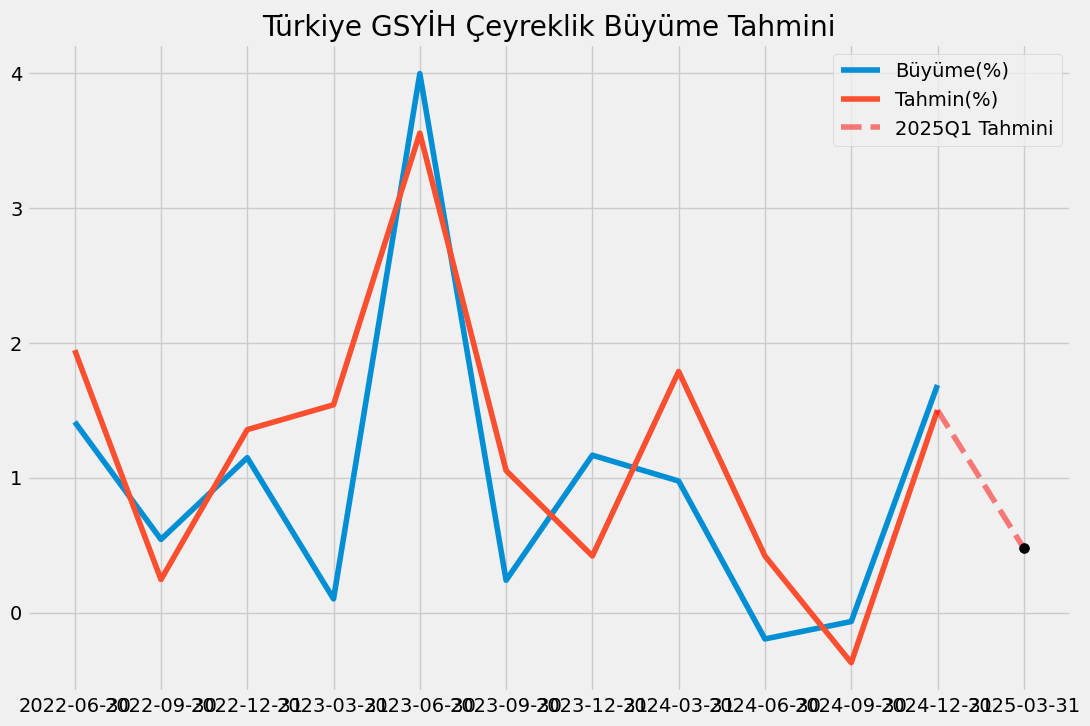

In [118]:
plt.figure(figsize=(12,8))
plt.title("Türkiye GSYİH Çeyreklik Büyüme Tahmini")
plt.plot(tahminler1["Büyüme"][:-1],label="Büyüme(%)")
plt.plot(tahminler1["Tahmin"][:-1],label="Tahmin(%)")
plt.plot(tahminler1["Tahmin"].iloc[-2:],"--",label="2025Q1 Tahmini",color="red",alpha=0.5)
plt.scatter(x=tahminler1.index[-1],y=tahminler1["Tahmin"][-1],color="black",s=50,zorder=3)
plt.legend()

In [ ]:
selected_features =["KKO","Kart","Sanayi","Tüketici Güven","Normal Sipariş","Reel Güven"]
X=scaled_data[selected_features]
y=scaled_data["Büyüme"]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X=pd.DataFrame(X,columns=selected_features)
y=pd.DataFrame(y,columns=["Büyüme"])
X_train,X_test=X.iloc[:-12,:],X.iloc[-12:,:]
y_train,y_test=y[:-12],y[-12:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)
for i in range(10):
    keras.utils.set_random_seed(i)
    early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
    model = Sequential()   
    model.add(Dense(units=30,activation='relu',input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.7932709205361588)))
    model.add(Dense(units=1))
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.004528856884552806)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
    history=model.fit(X_train, y_train, epochs=1000, batch_size=105,callbacks=[early_stopping],verbose=0,validation_data=(X_val,y_val))
    y_pred = model.predict(X_test)
    pred=scaler.inverse_transform(model.predict(np.array(X_test)))
    pred=pd.DataFrame(pred)
    pred.columns=["Büyüme"]
    pred=pred.set_index(pd.date_range(start="2022-09-30",periods=len(pred),freq="Q"))
    tahminler2=pd.DataFrame()
    tahminler2["Büyüme"]=data["Büyüme"].iloc[-12:]
    tahminler2["Tahmin"]=pred["Büyüme"]
    tahminler2.index=tahminler2.index.strftime("%Y-%m-%d")
    tahminler.append(pred.iloc[-1,0])
    hata.append(mean_squared_error(tahminler2["Büyüme"].iloc[:-1],tahminler2["Tahmin"].iloc[:-1]))
    modeller[f"NN_{i+10}"]=pred["Büyüme"]
    print(pred.iloc[-1,0])

1/1 [==============================] - 0s 68ms/step
0.99666375
1/1 [==============================] - 0s 69ms/step
0.95502675
1/1 [==============================] - 0s 63ms/step
0.96769863
1/1 [==============================] - 0s 67ms/step
0.90861326
1/1 [==============================] - 0s 66ms/step
0.91684574
1/1 [==============================] - 0s 65ms/step
0.8744277
1/1 [==============================] - 0s 65ms/step
0.8925026
1/1 [==============================] - 0s 129ms/step
0.9198551
1/1 [==============================] - 0s 67ms/step
0.57355833
1/1 [==============================] - 0s 106ms/step
0.86740106


In [125]:
selected_features =["KKO","Kart","Sanayi","Tüketici Güven","Normal Sipariş","Reel Güven"]
X=scaled_data[selected_features]
y=scaled_data["Büyüme"]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X=pd.DataFrame(X,columns=selected_features)
y=pd.DataFrame(y,columns=["Büyüme"])
X_train,X_test=X.iloc[:-12,:],X.iloc[-12:,:]
y_train,y_test=y[:-12],y[-12:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)
keras.utils.set_random_seed(42)
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
model = Sequential()   
model.add(Dense(units=30,activation='relu',input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.7932709205361588)))
model.add(Dense(units=1))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.004528856884552806)
model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model.fit(X_train, y_train, epochs=1000, batch_size=105,callbacks=[early_stopping],verbose=0,validation_data=(X_val,y_val))
y_pred = model.predict(X_test)
pred=scaler.inverse_transform(model.predict(np.array(X_test)))
pred=pd.DataFrame(pred)
pred.columns=["Büyüme"]
pred=pred.set_index(pd.date_range(start="2022-06-30",periods=len(pred),freq="Q"))


pred

1/1 [==============================] - 0s 75ms/step


,Büyüme
2022-06-30,1.924764
2022-09-30,-0.368872
2022-12-31,1.671649
2023-03-31,0.671174
2023-06-30,3.465108
2023-09-30,1.153011
2023-12-31,0.663016
2024-03-31,1.960833
2024-06-30,-0.191964
2024-09-30,-0.013128


In [126]:
tahminler2=pd.DataFrame()
tahminler2["Büyüme"]=data["Büyüme"].iloc[-12:]
tahminler2["Tahmin"]=pred["Büyüme"]
tahminler2.index=tahminler2.index.strftime("%Y-%m-%d")
tahminler2=tahminler2.round(1)
tahminler2

,Büyüme,Tahmin
2022-06-30,1.4,1.9
2022-09-30,0.5,-0.4
2022-12-31,1.1,1.7
2023-03-31,0.1,0.7
2023-06-30,4.0,3.5
2023-09-30,0.2,1.2
2023-12-31,1.2,0.7
2024-03-31,1.0,2.0
2024-06-30,-0.2,-0.2
2024-09-30,-0.1,-0.0


In [127]:
mean_squared_error(tahminler2["Büyüme"].iloc[:-1],tahminler2["Tahmin"].iloc[:-1])

0.3936363752321768

In [131]:
selected_features =["KKO","Kart","Sanayi","Tüketici Güven","Normal Sipariş","Reel Güven","Elektrik"]
X=scaled_data[selected_features]
y=scaled_data["Büyüme"]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X=pd.DataFrame(X,columns=selected_features)
y=pd.DataFrame(y,columns=["Büyüme"])
X_train,X_test=X.iloc[:-12,:],X.iloc[-12:,:]
y_train,y_test=y[:-12],y[-12:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)
for i in range(10):
    keras.utils.set_random_seed(i)
    early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
    model = Sequential()   
    model.add(Dense(units=65,activation='relu',input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.1830985132273648)))
    model.add(Dense(units=1))
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.015780709066154586)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
    history=model.fit(X_train, y_train, epochs=1000, batch_size=10,callbacks=[early_stopping],verbose=0,validation_data=(X_val,y_val))
    y_pred = model.predict(X_test)
    pred=scaler.inverse_transform(model.predict(np.array(X_test)))
    pred=pd.DataFrame(pred)
    pred.columns=["Büyüme"]
    pred=pred.set_index(pd.date_range(start="2022-06-30",periods=len(pred),freq="Q"))
    tahminler3=pd.DataFrame()
    tahminler3["Büyüme"]=data["Büyüme"].iloc[-12:]
    tahminler3["Tahmin"]=pred["Büyüme"]
    tahminler3.index=tahminler3.index.strftime("%Y-%m-%d")
    tahminler.append(pred.iloc[-1,0])
    hata.append(mean_squared_error(tahminler3["Büyüme"].iloc[:-1],tahminler3["Tahmin"].iloc[:-1]))
    modeller[f"NN_{i+20}"]=pred["Büyüme"]
    print(pred.iloc[-1,0])

1/1 [==============================] - 0s 66ms/step
0.827717
1/1 [==============================] - 0s 67ms/step
0.9527345
1/1 [==============================] - 0s 74ms/step
0.6818206
1/1 [==============================] - 0s 98ms/step
0.3050443
1/1 [==============================] - 0s 70ms/step
0.96907574
1/1 [==============================] - 0s 93ms/step
1.0332519
1/1 [==============================] - 0s 98ms/step
1.435987
1/1 [==============================] - 0s 79ms/step
0.9507122
1/1 [==============================] - 0s 67ms/step
1.1773165
1/1 [==============================] - 0s 69ms/step
0.84724766


In [132]:
keras.utils.set_random_seed(42)
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
model = Sequential()   
model.add(Dense(units=65,activation='relu',input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.1830985132273648)))
model.add(Dense(units=1))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.015780709066154586)
model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model.fit(X_train, y_train, epochs=1000, batch_size=10,callbacks=[early_stopping],verbose=0,validation_data=(X_val,y_val))
y_pred = model.predict(X_test)
pred=scaler.inverse_transform(model.predict(np.array(X_test)))
pred=pd.DataFrame(pred)
pred.columns=["Büyüme"]
pred=pred.set_index(pd.date_range(start="2022-06-30",periods=len(pred),freq="Q"))

pred=scaler.inverse_transform(model.predict(np.array(X_test)))
pred=pd.DataFrame(pred)
pred.columns=["Büyüme"]
pred=pred.set_index(pd.date_range(start="2022-06-30",periods=len(pred),freq="Q"))
pred

1/1 [==============================] - 0s 25ms/step


,Büyüme
2022-06-30,1.224527
2022-09-30,-0.078430
2022-12-31,1.445452
2023-03-31,1.075328
2023-06-30,3.520009
2023-09-30,0.542468
2023-12-31,1.101931
2024-03-31,2.000118
2024-06-30,0.352475
2024-09-30,-0.526236


In [133]:
tahminler3=pd.DataFrame()
tahminler3["Büyüme"]=data["Büyüme"].iloc[-12:]
tahminler3["Tahmin"]=pred["Büyüme"]
tahminler3.index=tahminler3.index.strftime("%Y-%m-%d")
tahminler3

,Büyüme,Tahmin
2022-06-30,1.414399,1.224527
2022-09-30,0.542207,-0.078430
2022-12-31,1.148543,1.445452
2023-03-31,0.101158,1.075328
2023-06-30,3.998077,3.520009
2023-09-30,0.239144,0.542468
2023-12-31,1.166981,1.101931
2024-03-31,0.975410,2.000118
2024-06-30,-0.195958,0.352475
2024-09-30,-0.067054,-0.526236


In [134]:
mean_squared_error(tahminler2["Büyüme"].iloc[:-1],tahminler2["Tahmin"].iloc[:-1])

0.3936363752321768

In [135]:
predictions=pd.DataFrame()
predictions["Tahmin"]=tahminler
predictions["Hata"]=hata
predictions["Ağırlık"]=1/predictions["Hata"]
predictions

,Tahmin,Hata,Ağırlık
0,0.281852,3.736191,0.267652
1,0.499677,7.120193,0.140446
2,-0.110290,5.816757,0.171917
3,2.837887,6.468055,0.154606
4,-0.643399,5.389697,0.185539
5,0.526963,2.500298,0.399952
6,0.864534,5.348195,0.186979
7,0.574663,3.058328,0.326976
8,0.303727,2.236430,0.447141
9,0.072684,3.932348,0.254301


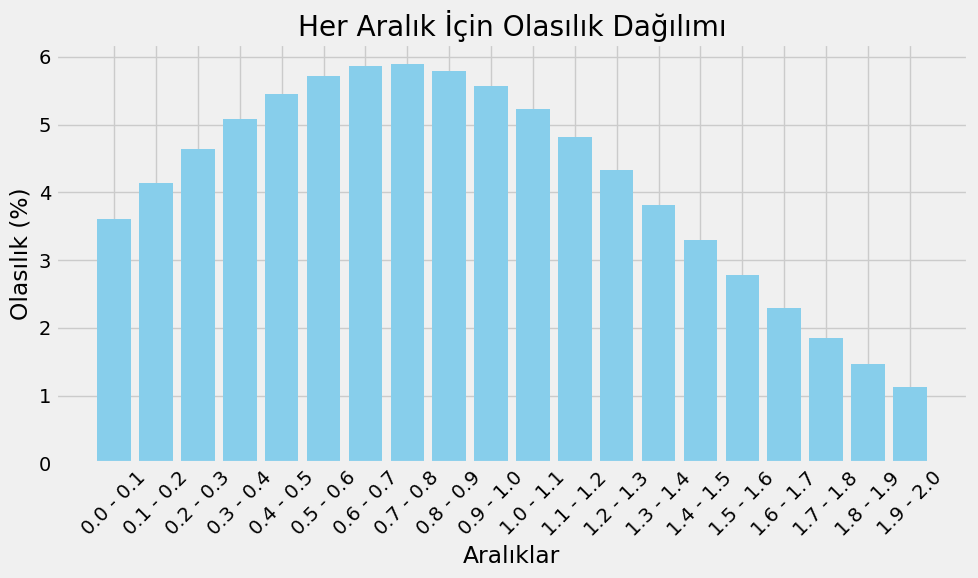

In [136]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

tahmin_degerleri = predictions["Tahmin"]

# Ortalama ve standart sapma hesapla
ortalama = np.mean(tahmin_degerleri)
standart_sapma = np.std(tahmin_degerleri)

# 1.7'den başlayıp her 0.1'lik aralık için olasılık hesaplama
baslangic = 0
bitis =  2.1

# 0.1'lik adımlarla aralıkları hesaplama
araliklar = np.arange(baslangic, bitis, 0.1)
olasliklar = []

for i in range(len(araliklar) - 1):
    alt = araliklar[i]
    ust = araliklar[i + 1]
    # Aralık için olasılığı hesapla
    olasilik = stats.norm.cdf(ust, loc=ortalama, scale=standart_sapma) - stats.norm.cdf(alt, loc=ortalama, scale=standart_sapma)
    olasliklar.append((alt, ust, olasilik))

# Bar grafik için verileri hazırlama
araliklar_labels = [f"{alt:.1f} - {ust:.1f}" for alt, ust, _ in olasliklar]
olasliklar_degerleri = [olasilik * 100 for _, _, olasilik in olasliklar]  # Olasılığı yüzdeye dönüştür

# Bar grafik oluşturma
plt.figure(figsize=(10, 6))
plt.bar(araliklar_labels, olasliklar_degerleri, color='skyblue')

# Başlık ve etiketler
plt.title('Her Aralık İçin Olasılık Dağılımı')
plt.xlabel('Aralıklar')
plt.ylabel('Olasılık (%)')
plt.xticks(rotation=45)  # Etiketlerin daha okunabilir olması için döndürme

# Grafiği gösterme
plt.tight_layout()
plt.show()

In [137]:
tahmin_degerleri=predictions["Tahmin"]
ortalama = np.sum(predictions["Tahmin"]*predictions["Ağırlık"])/(np.sum(predictions["Ağırlık"]))
standart_sapma = np.std(tahmin_degerleri)

for esik in [0.995]:
    z = stats.norm.ppf(esik) 
    if esik==0.995:
        guven=99
    elif esik==0.975:
        guven=95
    elif esik==0.95:
        guven=90
    elif esik==0.85:
        guven=70


    alt_limit = ortalama - z * standart_sapma
    ust_limit = ortalama + z * standart_sapma

    print(f"%{guven} olasılıkla tahminler {alt_limit:.2f} ile {ust_limit:.2f} arasındadır.")

%99 olasılıkla tahminler -0.95 ile 2.54 arasındadır.


In [140]:
sonuç=pd.DataFrame()
sonuç=pd.concat([tahminler1["Tahmin"],tahminler2["Tahmin"],tahminler3["Tahmin"]],axis=1)
sonuç["Ortalama"]=sonuç.mean(axis=1)
sonuç["Büyüme"]=tahminler1["Büyüme"]
sonuç.index=pd.to_datetime(sonuç.index)
sonuç=sonuç.round(1)
sonuç

,Tahmin,Tahmin,Tahmin,Ortalama,Büyüme
2022-06-30,1.9,1.9,1.2,1.7,1.4
2022-09-30,0.2,-0.4,-0.1,-0.1,0.5
2022-12-31,1.4,1.7,1.4,1.5,1.1
2023-03-31,1.5,0.7,1.1,1.1,0.1
2023-06-30,3.6,3.5,3.5,3.5,4.0
2023-09-30,1.1,1.2,0.5,0.9,0.2
2023-12-31,0.4,0.7,1.1,0.7,1.2
2024-03-31,1.8,2.0,2.0,1.9,1.0
2024-06-30,0.4,-0.2,0.4,0.2,-0.2
2024-09-30,-0.4,-0.0,-0.5,-0.3,-0.1


In [141]:
import pandas as pd
from datetime import datetime


csv_file = "cari.csv"
df = pd.read_csv(csv_file, index_col=0)

# Bugünün tarihini "dd-mm-yyyy" formatında al
today_date = datetime.today().strftime("%Y-%m-%d")

# Yeni tahmin değeri
new_tahmin = sonuç["Ortalama"].iloc[-1]

try:
    df.loc[today_date] = [new_tahmin, ust_limit, alt_limit]
except:
    pass

df.to_csv(csv_file)

print(f"{today_date} tarihli tahmin başarıyla eklendi.")


2025-05-02 tarihli tahmin başarıyla eklendi.


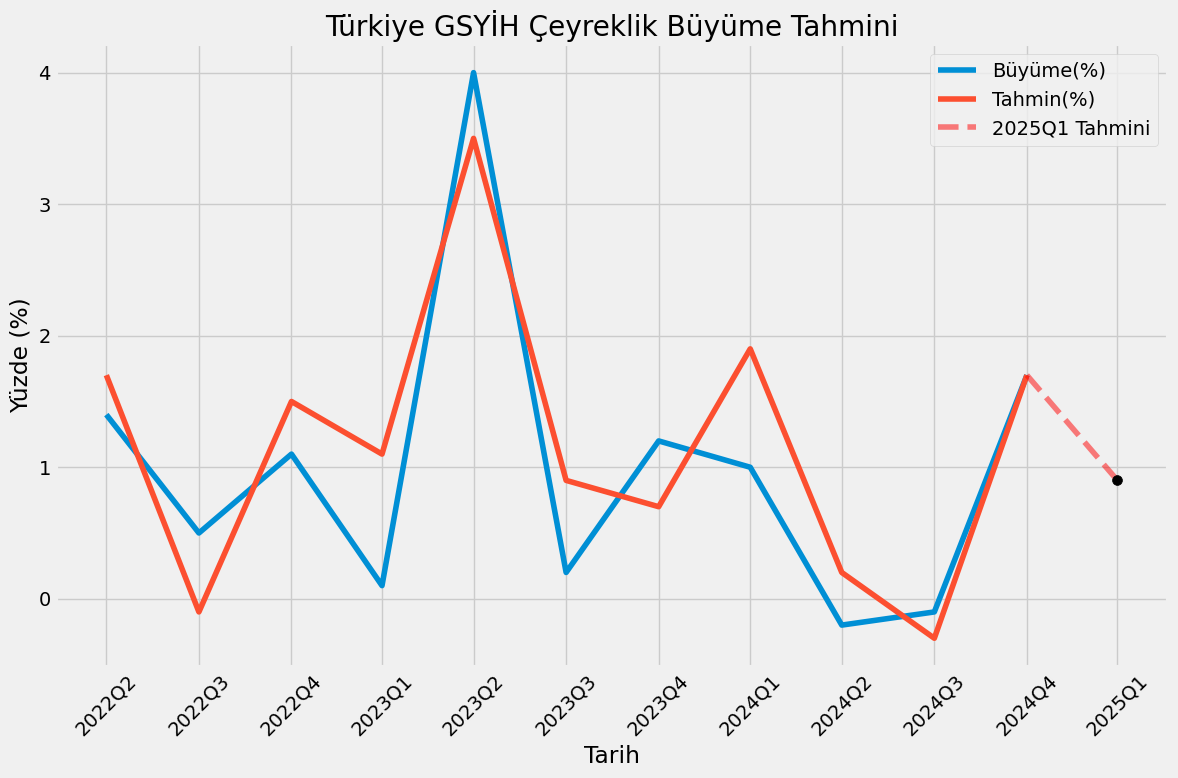

In [142]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def tarih_ceyrek(tarih):
    yil = tarih.year
    ay = tarih.month
    if ay <= 3:
        return f"{yil}Q1"
    elif ay <= 6:
        return f"{yil}Q2"
    elif ay <= 9:
        return f"{yil}Q3"
    else:
        return f"{yil}Q4"

plt.figure(figsize=(12, 8))
plt.title("Türkiye GSYİH Çeyreklik Büyüme Tahmini")

# Tahminlerin çizimi
plt.plot(sonuç["Büyüme"][:-1], label="Büyüme(%)")
plt.plot(sonuç["Ortalama"][:-1], label="Tahmin(%)")

# 2024Q1 Tahmini çizimi
plt.plot(sonuç["Ortalama"].iloc[-2:], "--", label="2025Q1 Tahmini", color="red", alpha=0.5)

# Son tahmin noktasının gösterimi
plt.scatter(x=sonuç.index[-1], y=sonuç["Ortalama"][-1], color="black", s=50, zorder=3)

# Eksen etiketlerinin ve gösterge için konfigürasyon
plt.legend()
# Çeyreklik gösterimi için eksen etiketlerinin ve formatın ayarlanması
tarihler = [tarih_ceyrek(t) for t in sonuç.index]
plt.xticks(ticks=sonuç.index, labels=tarihler, rotation=45)
plt.xlabel('Tarih')
plt.ylabel('Yüzde (%)')
plt.grid(True)


plt.tight_layout()
plt.show()


In [190]:
yıllık=pd.read_excel("gayrisafi yurtici hasila harcama yontemiyle mevsim ve takvim etkisinden arindirilmis zincirlenmis ha.xls")
yıllık=yıllık.iloc[6:34,14:18]


veri=[]
for i in range(len(yıllık)):
   veri.append(yıllık.iloc[i,:].values)


veri=np.array(veri)
veri=veri.reshape(1,-1)
veri=pd.DataFrame(veri.T)
veri.columns=["Büyüme"]
veri=veri.dropna()
veri=veri.set_index(pd.date_range(start="1998-03-31",freq="Q",periods=len(veri)))

In [199]:
veri

,Büyüme,Tahmin,Üst,Alt
2022-06-30,NaN,-6.004167,-100.000000,-100.000000
2022-09-30,NaN,-7.605856,-100.000000,-100.000000
2022-12-31,NaN,-7.183726,-100.000000,-100.000000
2023-03-31,NaN,-7.321774,-100.000000,-100.000000
2023-06-30,5.869889,5.362847,-100.000000,-100.000000
2023-09-30,5.550766,6.246641,-100.000000,-100.000000
2023-12-31,5.570007,5.082702,-100.000000,-100.000000
2024-03-31,6.492022,7.467126,-100.000000,-100.000000
2024-06-30,2.197411,2.602864,-100.000000,-100.000000
2024-09-30,1.885232,1.647735,-100.000000,-100.000000


In [192]:


veri.loc[pd.to_datetime("2025-03-31")]=veri["Büyüme"].iloc[-1]*(1+(sonuç["Ortalama"].iloc[-1]/100))


In [195]:
veri["Tahmin"]=0
veri["Tahmin"].loc[sonuç.index[0]]=veri.loc["2022-06-30","Büyüme"]*(1+(sonuç["Ortalama"].iloc[0]/100))
for i in range(1,len(sonuç)):
    veri["Tahmin"].loc[sonuç.index[i]]=veri.loc[sonuç.index[i-1],"Büyüme"]*(1+(sonuç["Ortalama"].iloc[i]/100))

veri["Üst"]=0
veri["Üst"].iloc[-1]=(1+(df["Üst"].iloc[-1]/100))*veri.loc[sonuç.index[-2],"Büyüme"]

veri["Alt"]=0
veri["Alt"].iloc[-1]=(1+(df["Alt"].iloc[-1]/100))*veri.loc[sonuç.index[-2],"Büyüme"]

In [196]:
veri=veri[veri["Tahmin"]!=0]
for i in range(len(veri)):
    veri["Tahmin"].iloc[i]=((veri["Tahmin"].iloc[i]/veri["Büyüme"].iloc[i-4])-1)*100


In [197]:
veri["Üst"]=((veri["Üst"]/veri["Büyüme"].iloc[-5])-1)*100
veri["Alt"]=((veri["Alt"]/veri["Büyüme"].iloc[-5])-1)*100
veri["Büyüme"]=veri["Büyüme"].pct_change(4)*100



In [198]:
veri.to_csv("yıllık.csv")

In [200]:
import pandas as pd
from datetime import datetime


csv_file = "cariyıl.csv"
df = pd.read_csv(csv_file, index_col=0)

# Bugünün tarihini "dd-mm-yyyy" formatında al
today_date = datetime.today().strftime("%Y-%m-%d")

# Yeni tahmin değeri
new_tahmin = veri["Büyüme"].iloc[-1]
ust_limit=veri["Üst"].iloc[-1]
alt_limit=veri["Alt"].iloc[-1]
try:
    df.loc[today_date] = [new_tahmin, ust_limit, alt_limit]
except:
    pass

df.to_csv(csv_file)

print(f"{today_date} tarihli tahmin başarıyla eklendi.")


2025-05-02 tarihli tahmin başarıyla eklendi.


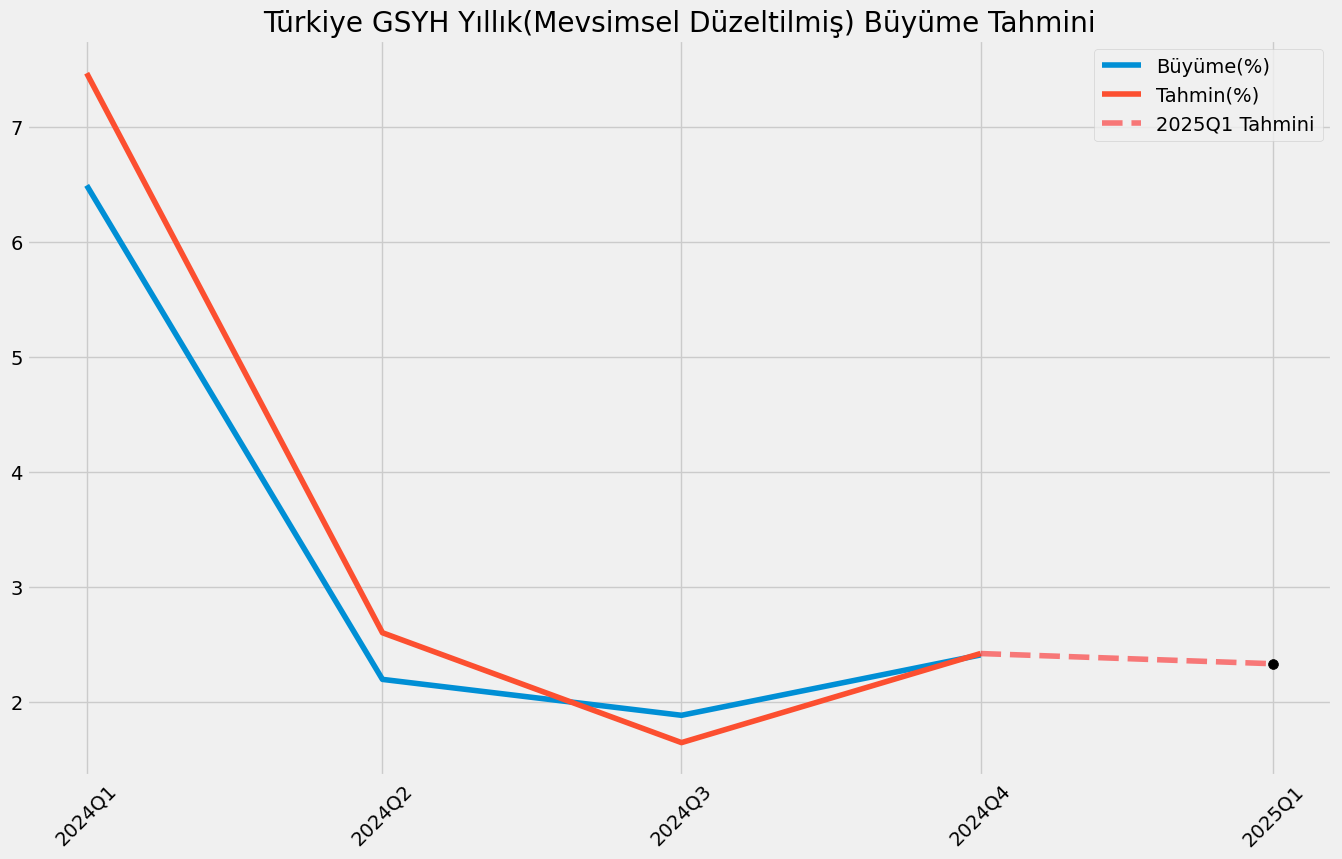

In [201]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def tarih_ceyrek(tarih):
    yil = tarih.year
    ay = tarih.month
    if ay <= 3:
        return f"{yil}Q1"
    elif ay <= 6:
        return f"{yil}Q2"
    elif ay <= 9:
        return f"{yil}Q3"
    else:
        return f"{yil}Q4"

plt.figure(figsize=(15, 20))
plt.subplot(2,1,1)
plt.title("Türkiye GSYH Yıllık(Mevsimsel Düzeltilmiş) Büyüme Tahmini")

# Tahminlerin çizimi
plt.plot(veri["Büyüme"][-5:-1], label="Büyüme(%)")
plt.plot(veri["Tahmin"][-5:-1], label="Tahmin(%)")

# 2024Q1 Tahmini çizimi
plt.plot(veri["Tahmin"].iloc[-2:], "--", label="2025Q1 Tahmini", color="red", alpha=0.5)

# Son tahmin noktasının gösterimi
plt.scatter(x=veri.index[-1], y=veri["Tahmin"][-1], color="black", s=50, zorder=3)

# Eksen etiketlerinin ve gösterge için konfigürasyon
plt.legend()
# Çeyreklik gösterimi için eksen etiketlerinin ve formatın ayarlanması
tarihler = [tarih_ceyrek(t) for t in veri.index[-5:]]
plt.xticks(ticks=veri.index[-5:], labels=tarihler, rotation=45)
plt.grid(True)





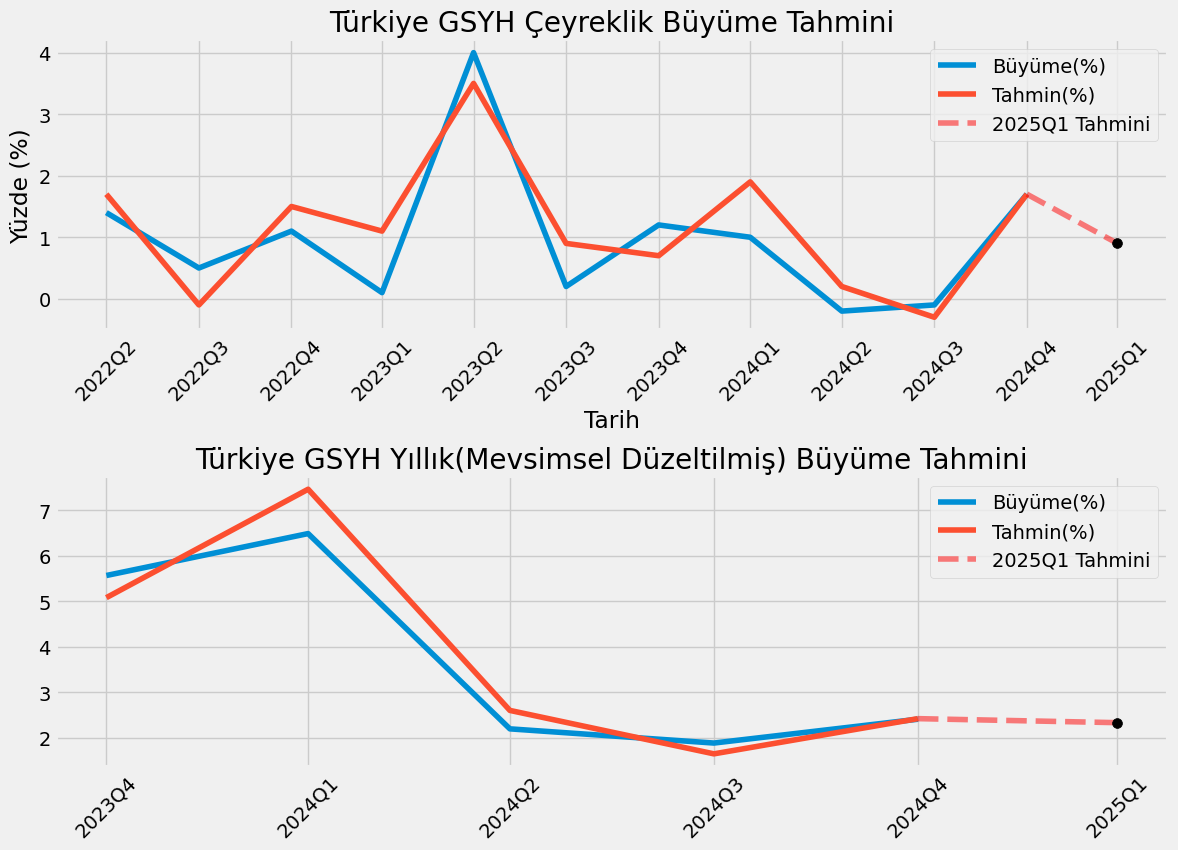

In [202]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def tarih_ceyrek(tarih):
    yil = tarih.year
    ay = tarih.month
    if ay <= 3:
        return f"{yil}Q1"
    elif ay <= 6:
        return f"{yil}Q2"
    elif ay <= 9:
        return f"{yil}Q3"
    else:
        return f"{yil}Q4"

plt.figure(figsize=(12, 8))
plt.subplot(2,1,1)
plt.title("Türkiye GSYH Çeyreklik Büyüme Tahmini")

# Tahminlerin çizimi
plt.plot(sonuç["Büyüme"][:-1], label="Büyüme(%)")
plt.plot(sonuç["Ortalama"][:-1], label="Tahmin(%)")

# 2024Q1 Tahmini çizimi
plt.plot(sonuç["Ortalama"].iloc[-2:], "--", label="2025Q1 Tahmini", color="red", alpha=0.5)

# Son tahmin noktasının gösterimi
plt.scatter(x=sonuç.index[-1], y=sonuç["Ortalama"][-1], color="black", s=50, zorder=3)

# Eksen etiketlerinin ve gösterge için konfigürasyon
plt.legend()
# Çeyreklik gösterimi için eksen etiketlerinin ve formatın ayarlanması
tarihler = [tarih_ceyrek(t) for t in sonuç.index]
plt.xticks(ticks=sonuç.index, labels=tarihler, rotation=45)
plt.xlabel('Tarih')
plt.ylabel('Yüzde (%)')
plt.grid(True)


plt.tight_layout()
plt.subplot(2,1,2)

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def tarih_ceyrek(tarih):
    yil = tarih.year
    ay = tarih.month
    if ay <= 3:
        return f"{yil}Q1"
    elif ay <= 6:
        return f"{yil}Q2"
    elif ay <= 9:
        return f"{yil}Q3"
    else:
        return f"{yil}Q4"



plt.title("Türkiye GSYH Yıllık(Mevsimsel Düzeltilmiş) Büyüme Tahmini")

# Tahminlerin çizimi
plt.plot(veri["Büyüme"][-6:-1], label="Büyüme(%)")
plt.plot(veri["Tahmin"][-6:-1], label="Tahmin(%)")

# 2024Q1 Tahmini çizimi
plt.plot(veri["Tahmin"].iloc[-2:], "--", label="2025Q1 Tahmini", color="red", alpha=0.5)

# Son tahmin noktasının gösterimi
plt.scatter(x=veri.index[-1], y=veri["Tahmin"][-1], color="black", s=50, zorder=3)

# Eksen etiketlerinin ve gösterge için konfigürasyon
plt.legend()
# Çeyreklik gösterimi için eksen etiketlerinin ve formatın ayarlanması
tarihler = [tarih_ceyrek(t) for t in veri.index[-6:]]
plt.xticks(ticks=veri.index[-6:], labels=tarihler, rotation=45)
plt.subplots_adjust(hspace=0.5)
plt.grid(True)





In [167]:
veri

,Büyüme,Tahmin,Üst,Alt
2022-06-30,NaN,-5.494515,-100.000000,-100.000000
2022-09-30,NaN,-7.605856,-100.000000,-100.000000
2022-12-31,NaN,-7.183726,-100.000000,-100.000000
2023-03-31,NaN,-7.321774,-100.000000,-100.000000
2023-06-30,5.869889,5.362847,-100.000000,-100.000000
2023-09-30,5.550766,6.246641,-100.000000,-100.000000
2023-12-31,5.570007,5.082702,-100.000000,-100.000000
2024-03-31,6.492022,7.467126,-100.000000,-100.000000
2024-06-30,2.197411,2.602864,-100.000000,-100.000000
2024-09-30,1.885232,1.647735,-100.000000,-100.000000


In [153]:
import os
import subprocess
from datetime import datetime
import time
import git
from git import Repo
import os
repo_dir = ".git"  # Buraya Git deposunun yolunu girin

def git_add_commit_push():
    try:
        # Repo nesnesini oluştur
        repo = Repo(repo_dir)
        assert not repo.bare

        # Git add: tüm değişiklikleri ekliyoruz
        repo.git.add(A=True)  # A=True ile tüm dosyalar eklenir

        # Commit işlemi
        commit_message = "update"
        repo.index.commit(commit_message)
        print(f"Commit işlemi başarılı: {commit_message}")

        # Push işlemi
        origin = repo.remote(name='origin')
        origin.push()
        print("Push işlemi başarılı.")

    except Exception as e:
        print(f"Git işlemi sırasında hata oluştu: {e}")


git_add_commit_push()

Commit işlemi başarılı: update
Push işlemi başarılı.


In [168]:
günlük=pd.read_csv("cari.csv",index_col=0).drop_duplicates(keep="last")
yıllık=pd.read_csv("cariyıl.csv",index_col=0).drop_duplicates(keep="last")
yıllık

,Tahmin,Üst,Alt
2024-12-09,1.466983,1.639763,1.329052
2024-12-11,1.436758,1.602258,1.304639
2024-12-12,1.446833,1.614760,1.312777
2024-12-13,1.477058,1.652264,1.337190
2024-12-16,1.456908,1.627261,1.320914
2024-12-18,1.486125,1.663516,1.344514
2024-12-19,1.426683,1.589756,1.296501
2024-12-20,1.507283,1.689769,1.361603
2024-12-23,1.487133,1.664766,1.345328
2024-12-24,1.536500,1.726024,1.385202


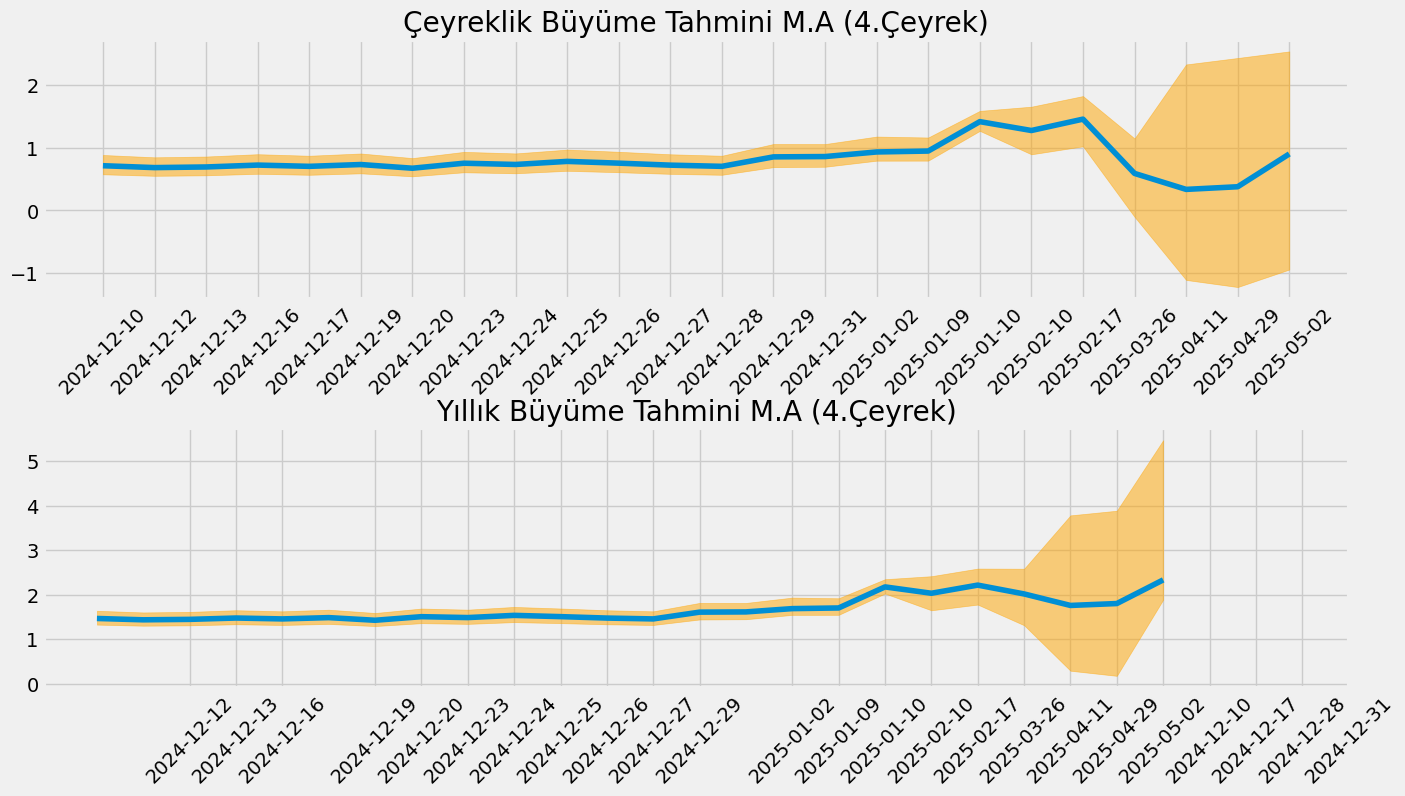

In [169]:

plt.figure(figsize=(15,8))
plt.subplot(2,1,1)
plt.title("Çeyreklik Büyüme Tahmini M.A (4.Çeyrek)")
plt.plot(günlük["Tahmin"],label="Ortalama")
plt.fill_between(günlük.index,günlük["Üst"],günlük["Alt"],alpha=0.5,color="orange")
plt.xticks(günlük.index,rotation=45)

plt.subplot(2,1,2)
plt.title("Yıllık Büyüme Tahmini M.A (4.Çeyrek)")
plt.plot(yıllık["Tahmin"],label="Ortalama")
plt.fill_between(yıllık.index,yıllık["Üst"],yıllık["Alt"],alpha=0.5,color="orange")
plt.xticks(günlük.index,rotation=45)

plt.subplots_adjust(hspace=0.5)


In [189]:
veri

,Büyüme,Tahmin,Üst,Alt
2022-06-30,NaN,-5.494515,-100.000000,-100.000000
2022-09-30,NaN,-7.605856,-100.000000,-100.000000
2022-12-31,NaN,-7.183726,-100.000000,-100.000000
2023-03-31,NaN,-7.321774,-100.000000,-100.000000
2023-06-30,5.869889,5.362847,-100.000000,-100.000000
2023-09-30,5.550766,6.246641,-100.000000,-100.000000
2023-12-31,5.570007,5.082702,-100.000000,-100.000000
2024-03-31,6.492022,7.467126,-100.000000,-100.000000
2024-06-30,2.197411,2.602864,-100.000000,-100.000000
2024-09-30,1.885232,1.647735,-100.000000,-100.000000


In [185]:



ham=pd.read_excel("veri3.xlsx",index_col=0)
arındırılmış=pd.read_excel("veri2.xlsx",index_col=0)
arındırılmış.index=pd.to_datetime(arındırılmış.index)
ham.index=pd.to_datetime(ham.index)


arındırılmış.loc["2025-03-31"]=((günlük["Tahmin"].iloc[-1]/100)+1)*arındırılmış.loc["2024-12-31"]
arındırılmış.index=pd.to_datetime(arındırılmış.index)

ham_yıllık=(((arındırılmış.loc["2025-03-31"].values[0]*0.901)/ham.loc["2024-03-31"])-1)*100
ham_yıllık=ham_yıllık.values[0]
ham_yıllık=np.round(ham_yıllık,2)


arındırılmış.loc["2025-03-31"]=((günlük["Üst"].iloc[-1]/100)+1)*arındırılmış.loc["2024-12-31"].values[0]

ham_yıllık_üst=(((arındırılmış.loc["2025-03-31"].values[0]*0.901)/ham.loc["2024-03-31"])-1)*100
ham_yıllık_üst=ham_yıllık_üst.values[0]
ham_yıllık_üst=np.round(ham_yıllık_üst,2)


arındırılmış.loc["2025-03-31"]=((günlük["Alt"].iloc[-1]/100)+1)*arındırılmış.loc["2024-12-31"].values[0]

ham_yıllık_alt=(((arındırılmış.loc["2025-03-31"].values[0]*0.901)/ham.loc["2024-03-31"])-1)*100
ham_yıllık_alt=ham_yıllık_alt.values[0]
ham_yıllık_alt=np.round(ham_yıllık_alt,2)

In [186]:
import pandas as pd
from datetime import datetime


csv_file = "ham.csv"
df = pd.read_csv(csv_file, index_col=0)

# Bugünün tarihini "dd-mm-yyyy" formatında al
today_date = datetime.today().strftime("%Y-%m-%d")

# Yeni tahmin değeri
new_tahmin = ham_yıllık
ust_limit=ham_yıllık_üst
alt_limit=ham_yıllık_alt
try:
    df.loc[today_date] = [new_tahmin, ust_limit, alt_limit]
except:
    pass

df.to_csv(csv_file)

print(f"{today_date} tarihli tahmin başarıyla eklendi.")


2025-05-02 tarihli tahmin başarıyla eklendi.


In [187]:
df

,Tahmin,Üst,Alt
2024-12-10,2.01,2.18,1.87
2024-12-11,2.03,2.21,1.88
2024-12-12,1.98,2.14,1.84
2024-12-13,1.99,2.16,1.85
2024-12-16,2.02,2.19,1.88
2024-12-17,2.00,2.17,1.86
2024-12-18,2.03,2.21,1.88
2024-12-19,2.03,2.20,1.88
2024-12-20,1.97,2.13,1.84
2024-12-23,2.05,2.23,1.90


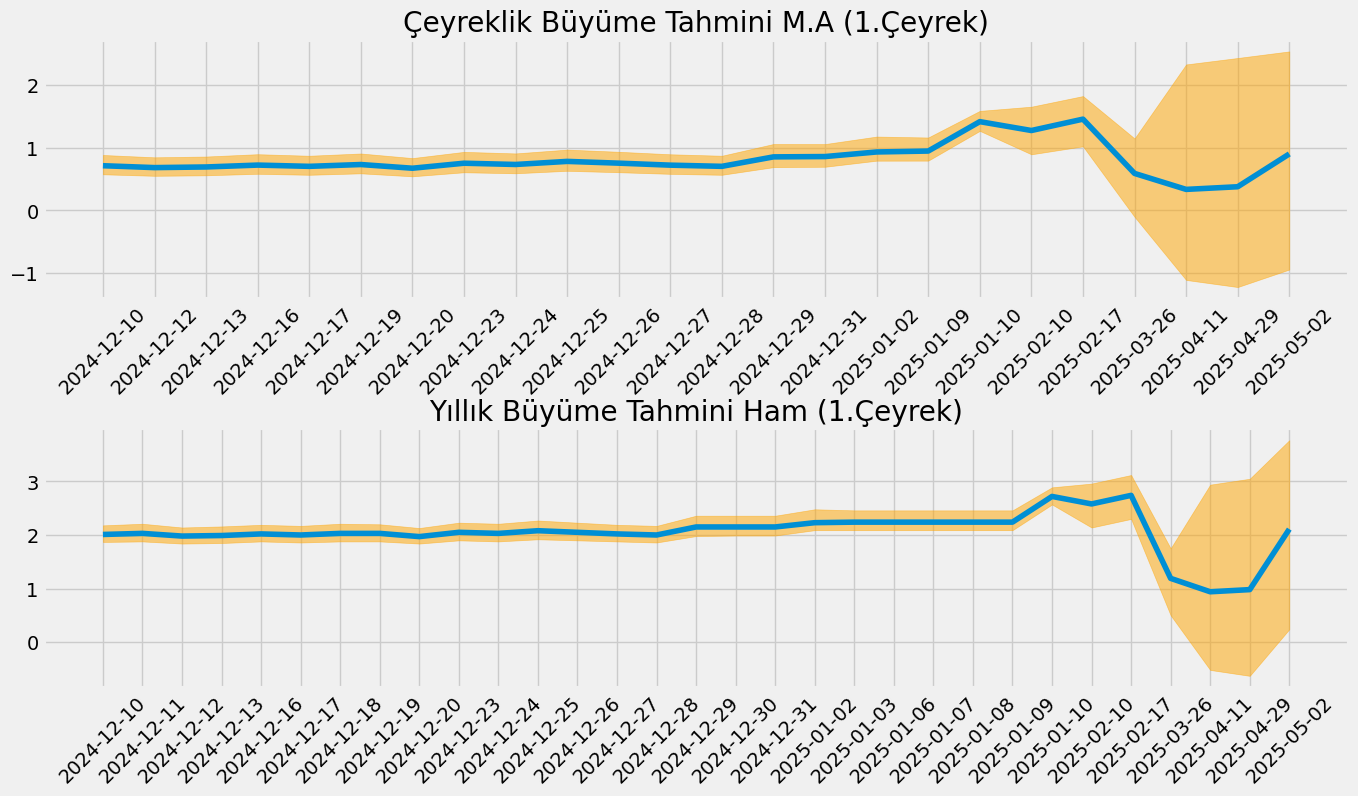

In [188]:

plt.figure(figsize=(15,8))
plt.subplot(2,1,1)
plt.title("Çeyreklik Büyüme Tahmini M.A (1.Çeyrek)")
plt.plot(günlük["Tahmin"],label="Ortalama")
plt.fill_between(günlük.index,günlük["Üst"],günlük["Alt"],alpha=0.5,color="orange")
plt.xticks(günlük.index,rotation=45)

plt.subplot(2,1,2)
plt.title("Yıllık Büyüme Tahmini Ham (1.Çeyrek)")
plt.plot(df["Tahmin"],label="Ortalama")
plt.fill_between(df.index,df["Üst"],df["Alt"],alpha=0.5,color="orange")
plt.xticks(df.index,rotation=45)

plt.subplots_adjust(hspace=0.5)
